<a href="https://colab.research.google.com/github/Chahinezehallaci/Chahinezehallaci/blob/main/Projet_scoring.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install optuna

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 308 kB 29.5 MB/s 
     |████████████████████████████████| 81 kB 9.8 MB/s 
     |████████████████████████████████| 209 kB 65.3 MB/s 
     |████████████████████████████████| 78 kB 7.2 MB/s 
     |████████████████████████████████| 112 kB 70.9 MB/s 
     |████████████████████████████████| 146 kB 70.5 MB/s 
     |████████████████████████████████| 49 kB 6.3 MB/s 
  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11137 sha256=42ed714c7562652a3ddf0e78288b03ae31eb803fd591c40197dbdd41d4ae587e
  Stored in directory: /root/.cache/pip/wheels/9f/18/84/8f69f8b08169c7bae2dde6bd7daf0c19fca8c8e500ee620a28
Successfully built pyperclip


In [ ]:
pip install sweetviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 15.1 MB 23.6 MB/s 


In [ ]:
pip install kds

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
import pandas as pd
import numpy as np

# visualisation
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import sweetviz as sv

# preprocessing
from fastai.basics import *
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
from sklearn.pipeline import Pipeline
import random

# modélisation
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import xgboost
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA, IncrementalPCA, LatentDirichletAllocation
from sklearn.manifold import TSNE
import optuna

# métriques
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    brier_score_loss,
    roc_auc_score,
    plot_roc_curve,
    accuracy_score,
    recall_score,
    fbeta_score,
    matthews_corrcoef
)

import warnings
warnings.filterwarnings('ignore')

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Scoring Project/autorisations.csv') # Kamar
pd.set_option('display.max_columns', None)

In [ ]:
df.shape

(1151432, 25)

In [ ]:
df.columns

Index(['Carte', 'Pays', 'Date', 'Heure', 'dateheure', 'CodeRep', 'MCC',
       'Montant', 'fraude', 'FM_Velocity_Condition_3',
       'FM_Velocity_Condition_6', 'FM_Velocity_Condition_12',
       'FM_Velocity_Condition_24', 'FM_Sum_3', 'FM_Sum_6', 'FM_Sum_12',
       'FM_Sum_24', 'FM_Redondance_MCC_3', 'FM_Redondance_MCC_6',
       'FM_Redondance_MCC_12', 'FM_Redondance_MCC_24', 'FM_Difference_Pays_3',
       'FM_Difference_Pays_6', 'FM_Difference_Pays_12',
       'FM_Difference_Pays_24'],
      dtype='object')

In [ ]:
df.head()

Carte  Pays        Date     Heure   dateheure  CodeRep   MCC  Montant  \
0    0.0   840  2003-12-02  17:47:52  2003-12-02       15  5812    69.25   
1    1.0   158  2003-11-25  06:00:20  2003-11-25       15  5311     1.00   
2    2.0   826  2003-11-12  14:10:57  2003-11-12       15  5211   516.95   
3    3.0   840  2003-11-07  03:41:55  2003-11-07       14  7399     0.01   
4    4.0   158  2003-11-23  05:07:03  2003-11-23       15  5311     1.00   

   fraude  FM_Velocity_Condition_3  FM_Velocity_Condition_6  \
0     0.0                      0.0                      0.0   
1     0.0                      0.0                      0.0   
2     0.0                      0.0                      0.0   
3     0.0                      0.0                      0.0   
4     0.0                      0.0                      0.0   

   FM_Velocity_Condition_12  FM_Velocity_Condition_24  FM_Sum_3  FM_Sum_6  \
0                       0.0                       0.0     69.25     69.25   
1                       0.0                       0.0      1.00      1.00   
2                       0.0                       0.0    516.95    516.95   
3                       0.0                       0.0      0.01      0.01   
4                       0.0                       0.0      1.00      1.00   

   FM_Sum_12  FM_Sum_24  FM_Redondance_MCC_3  FM_Redondance_MCC_6  \
0      69.25      69.25                  1.0                  1.0   
1       1.00       1.00                  1.0                  1.0   
2     516.95     516.95                  1.0                  1.0   
3       0.01       0.01                  1.0                  1.0   
4       1.00       1.00                  1.0                  1.0   

   FM_Redondance_MCC_12  FM_Redondance_MCC_24  FM_Difference_Pays_3  \
0                   1.0                   1.0                   1.0   
1                   1.0                   1.0                   1.0   
2                   1.0                   1.0                   1.0   
3                   1.0                   1.0                   1.0   
4                   1.0                   1.0                   1.0   

   FM_Difference_Pays_6  FM_Difference_Pays_12  FM_Difference_Pays_24  
0                   1.0                    1.0                    1.0  
1                   1.0                    1.0                    1.0  
2                   1.0                    1.0                    1.0  
3                   1.0                    1.0                    1.0  
4                   1.0                    1.0                    1.0

In [ ]:
df.isna().sum().sum() # no missing values

0

In [ ]:
df.duplicated().sum() # no duplicates

0

                                             |          | [  0%]   00:00 -> (? left)


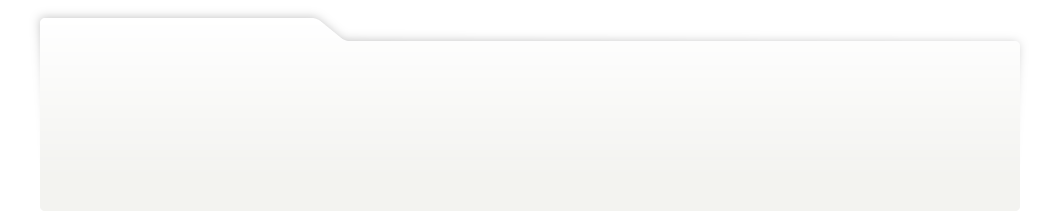
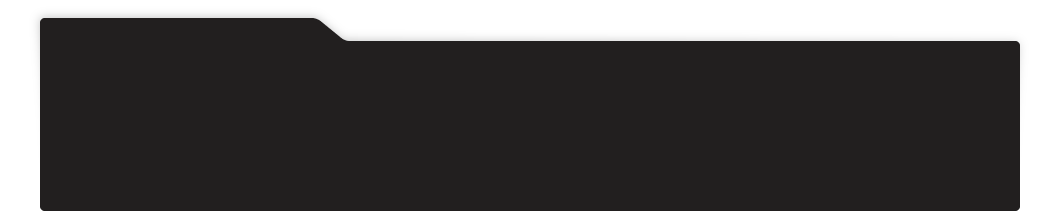
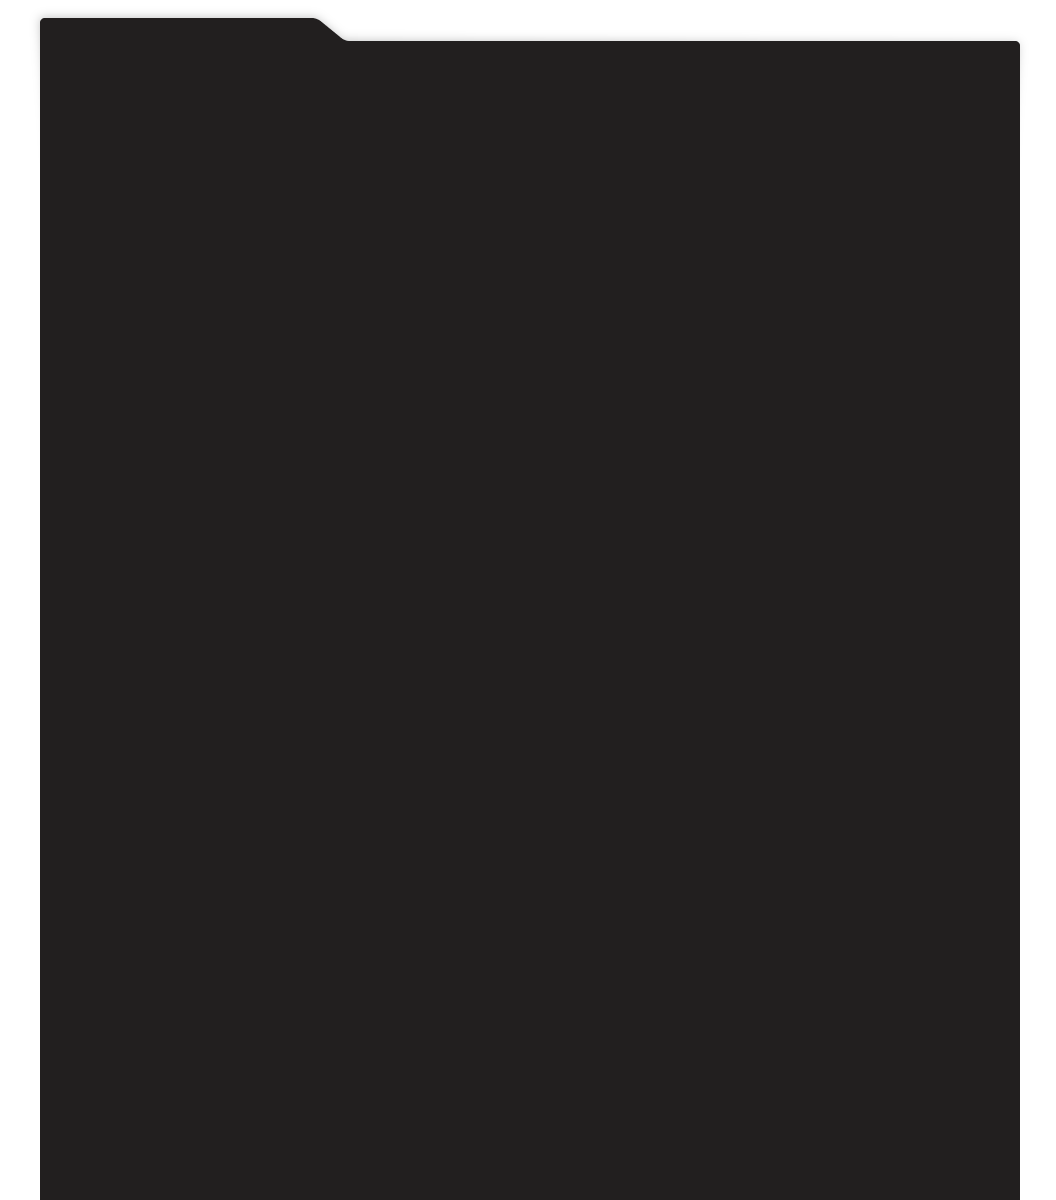
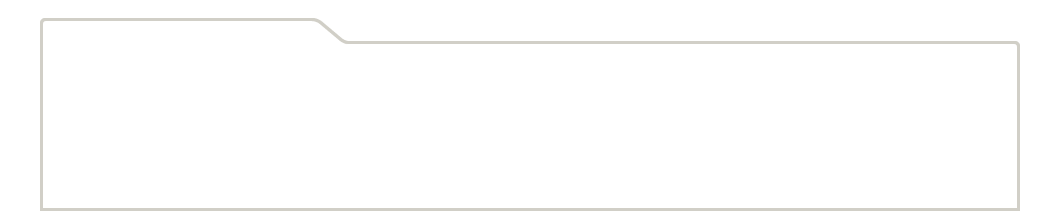
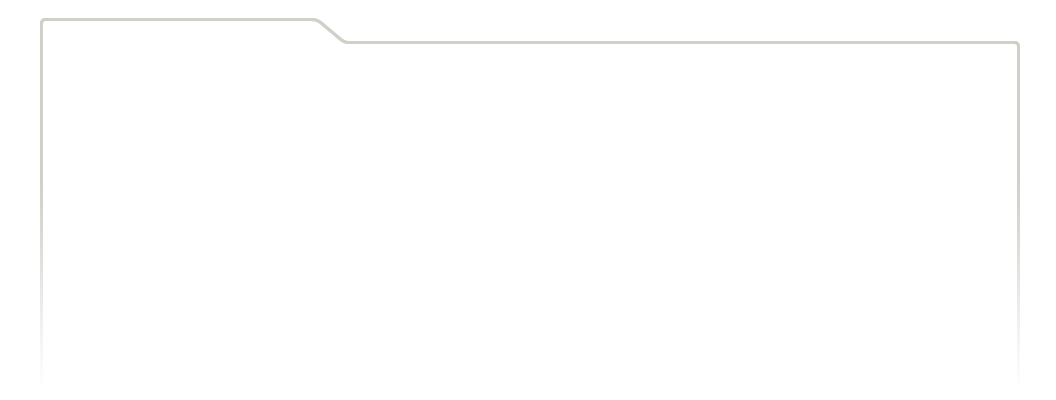
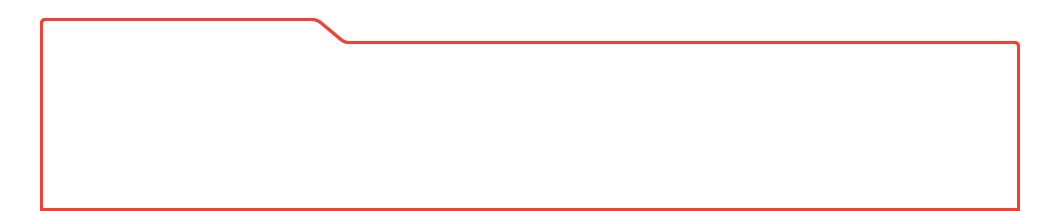
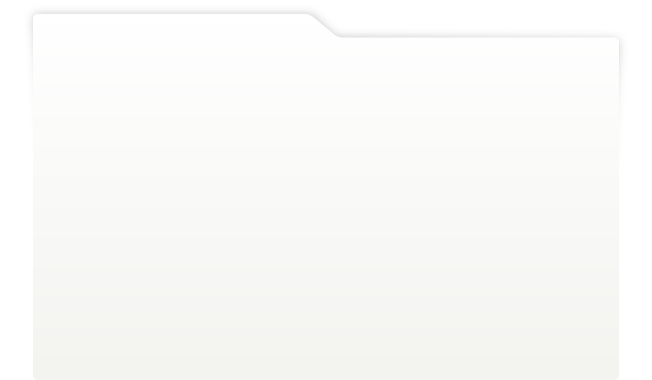
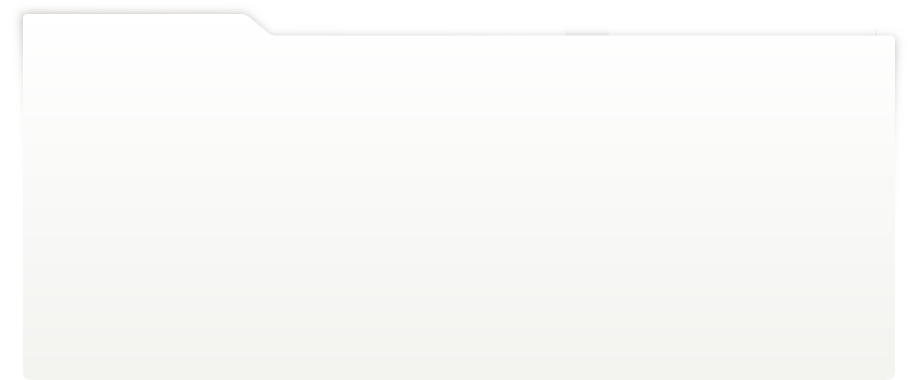
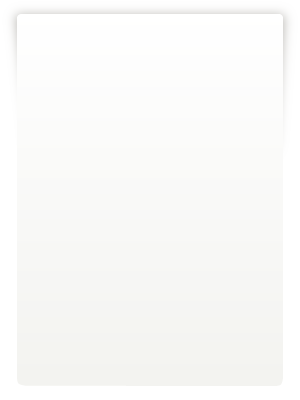
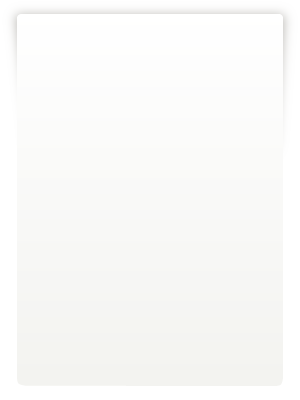
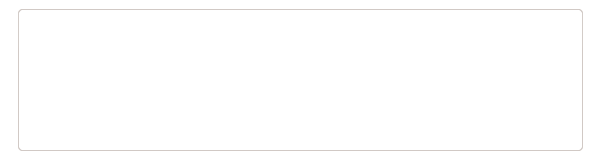
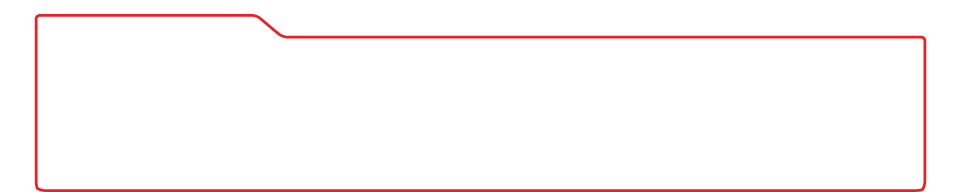
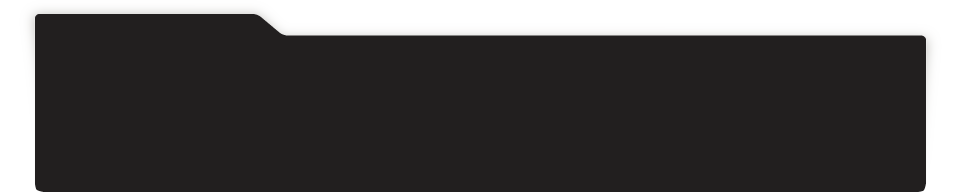
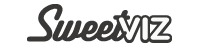
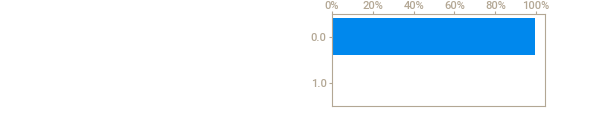
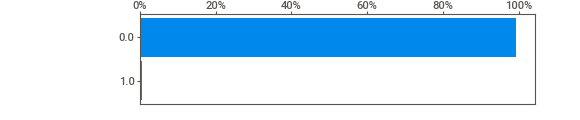
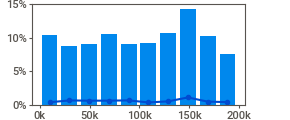
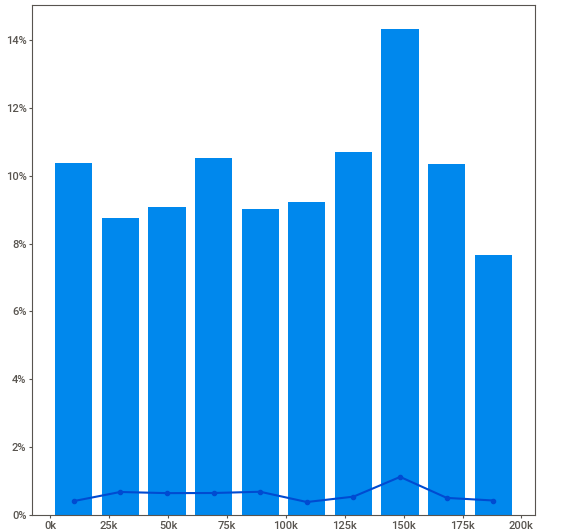
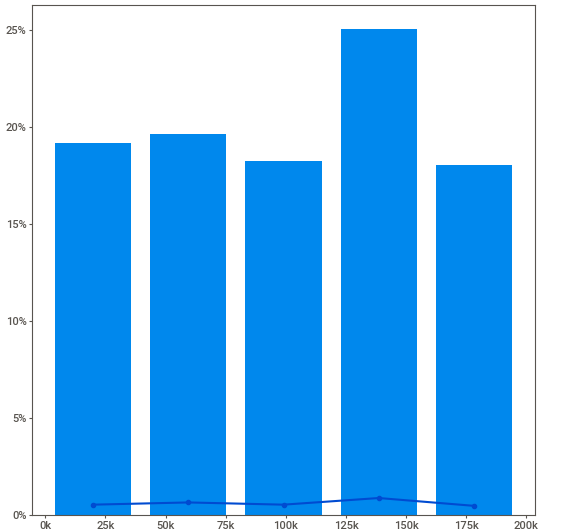
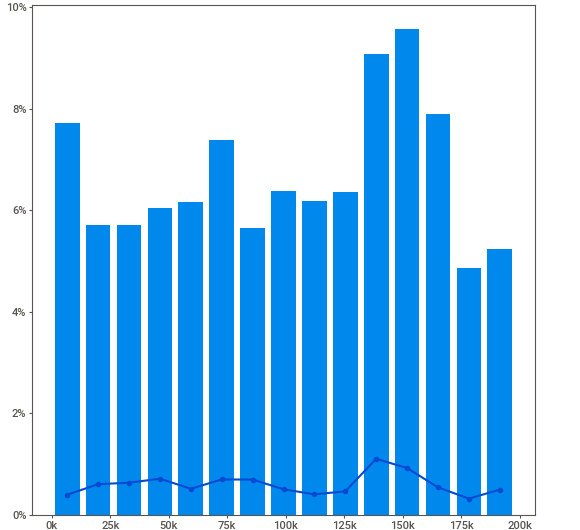
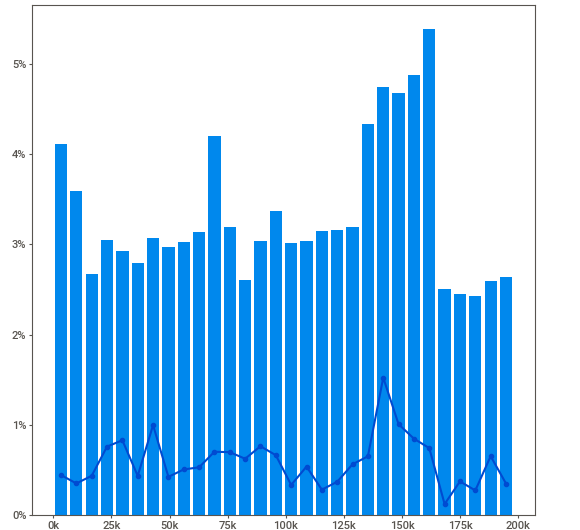
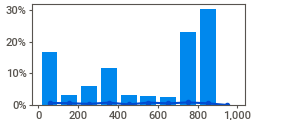
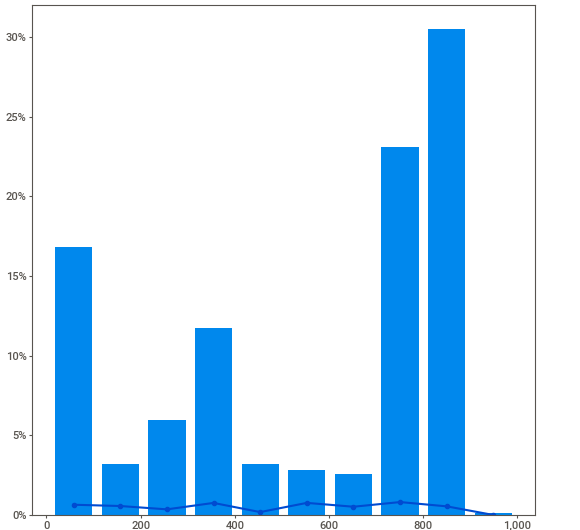
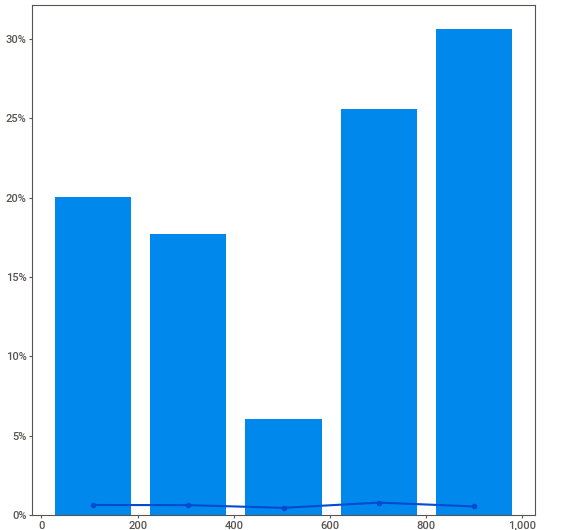
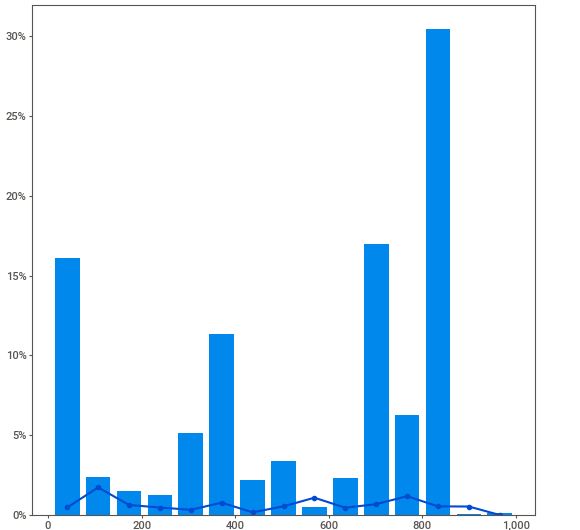
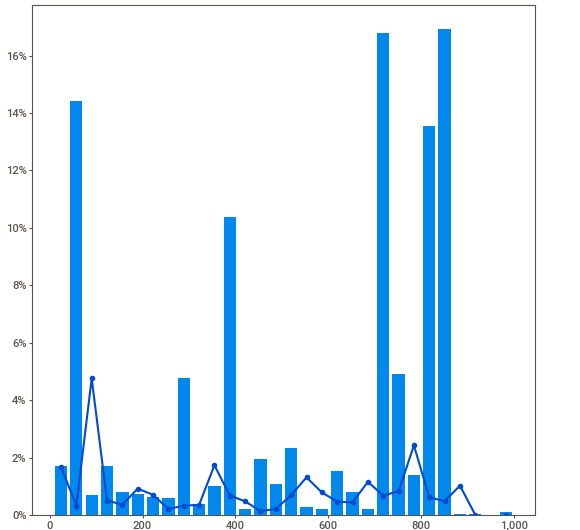
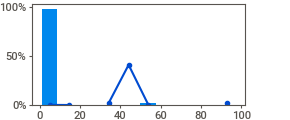
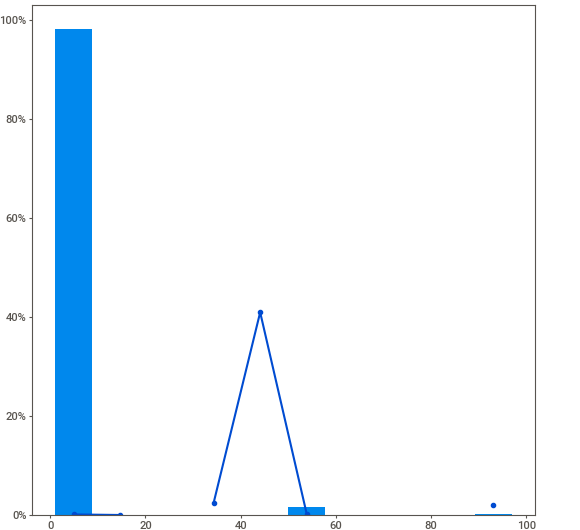
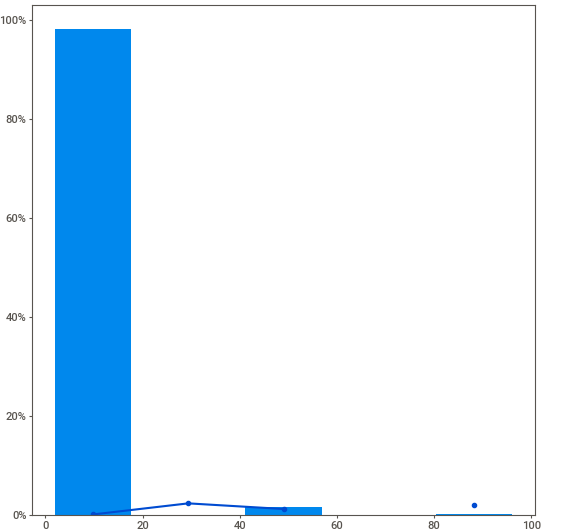
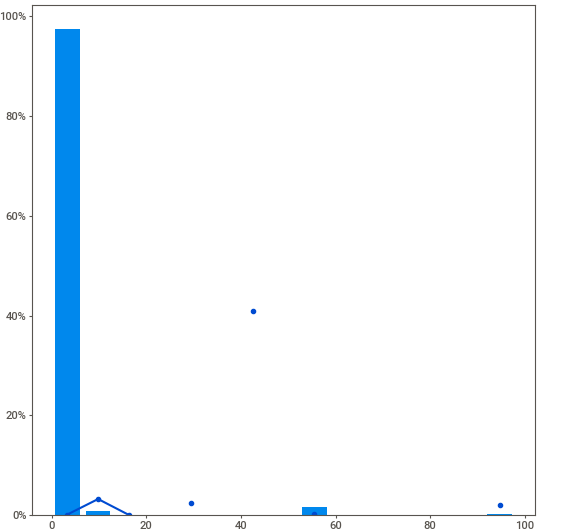
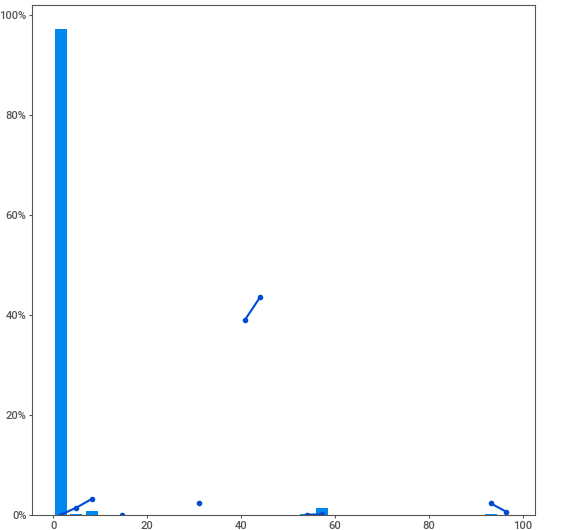
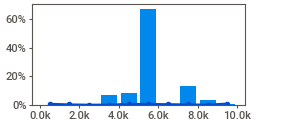
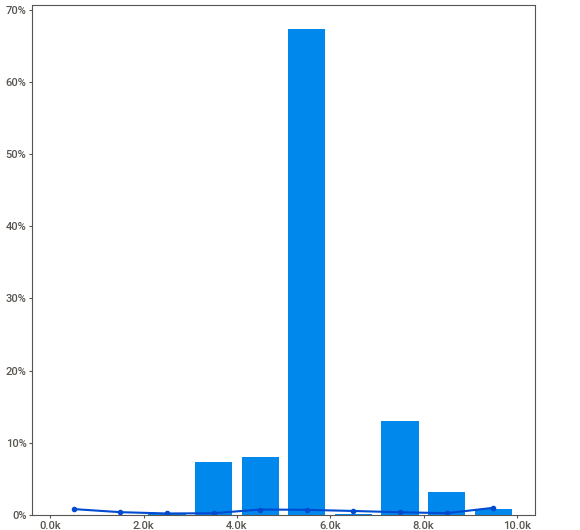
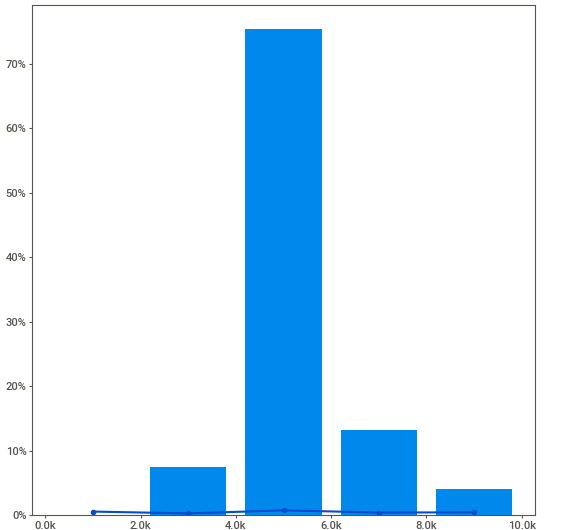
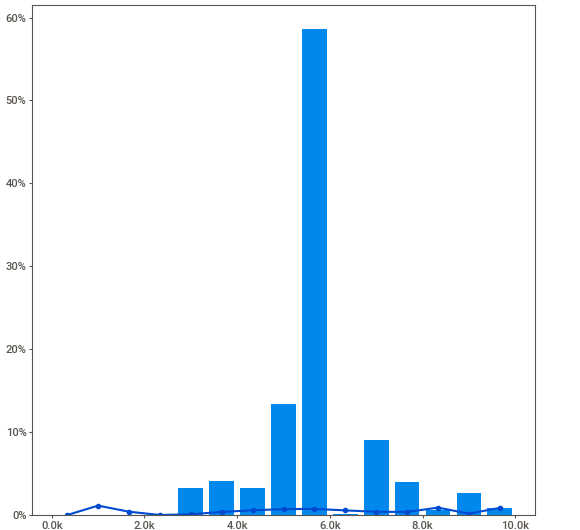
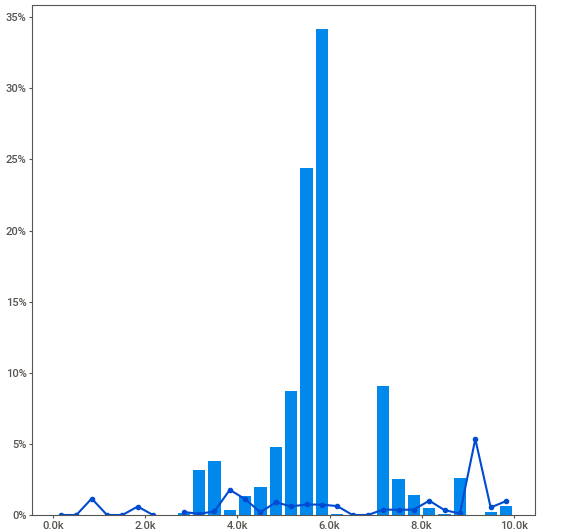
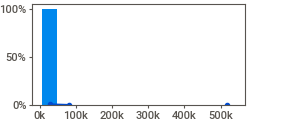
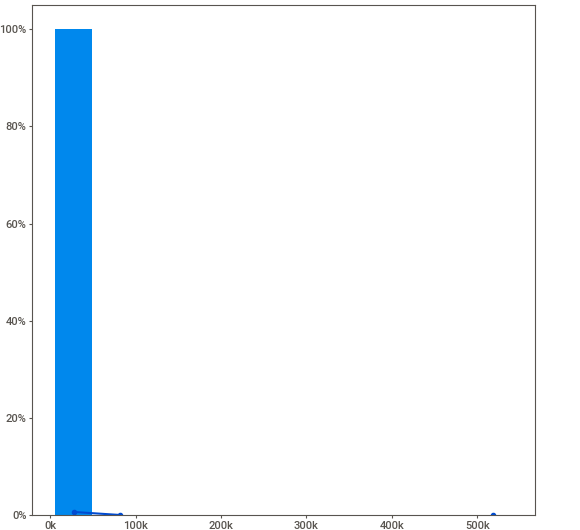
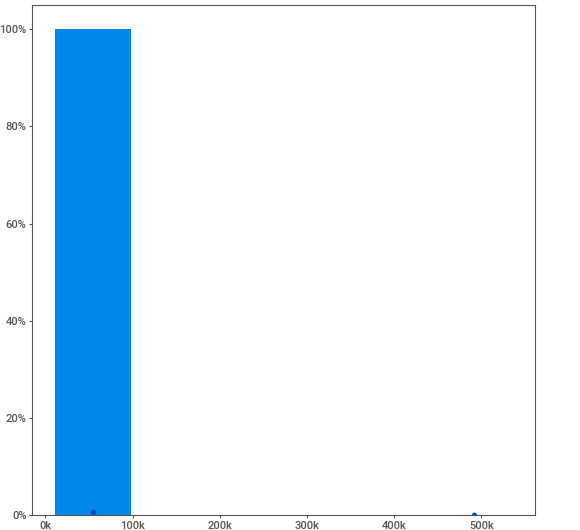
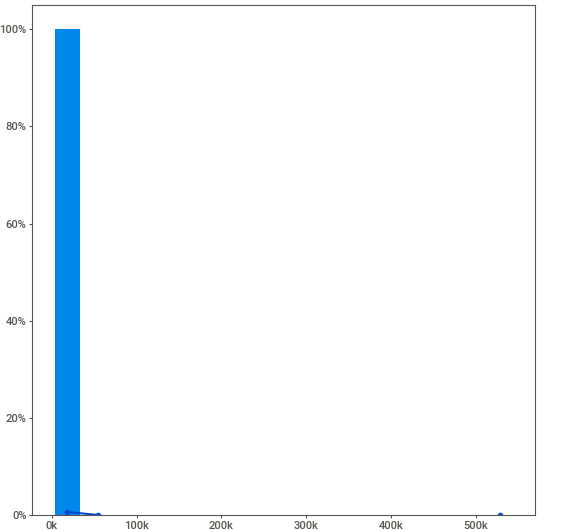
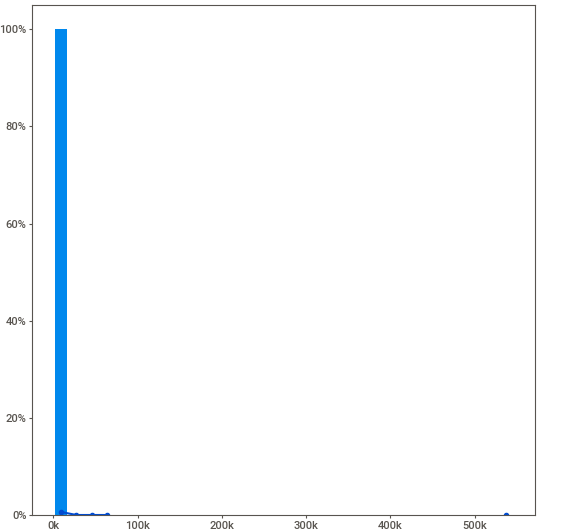
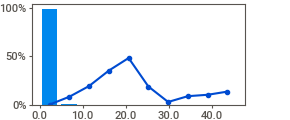
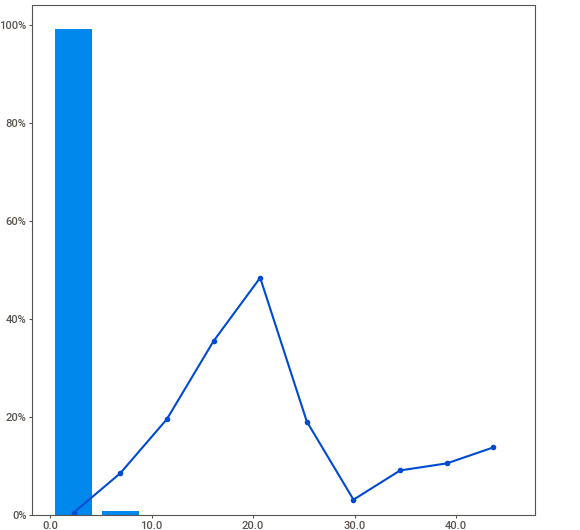
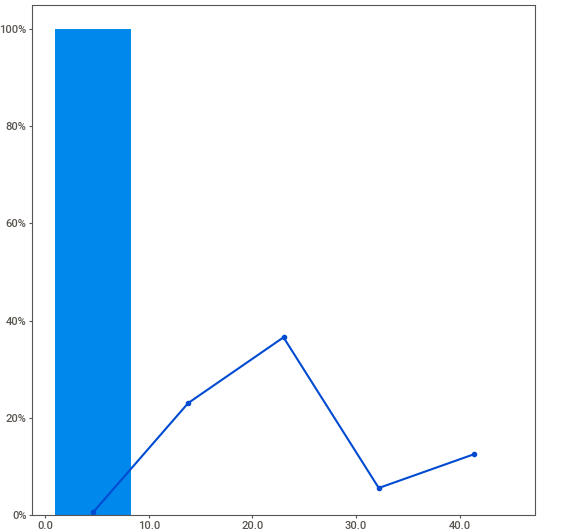
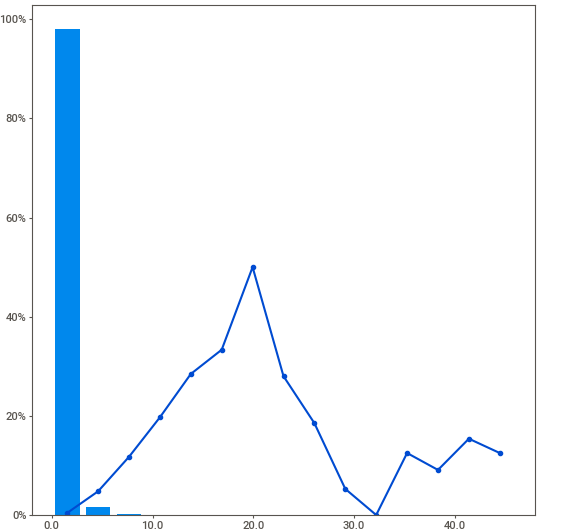
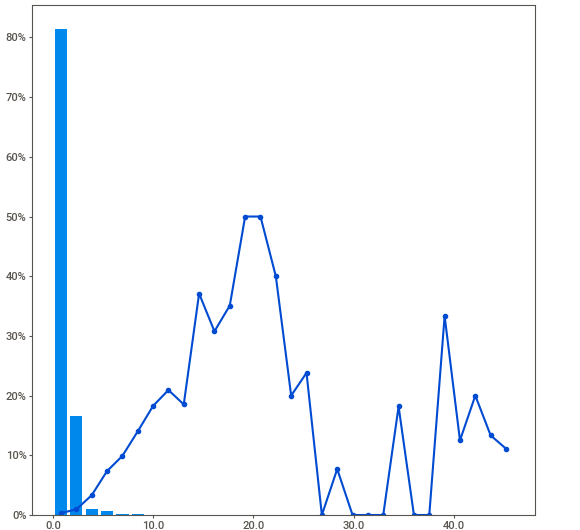
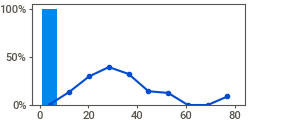
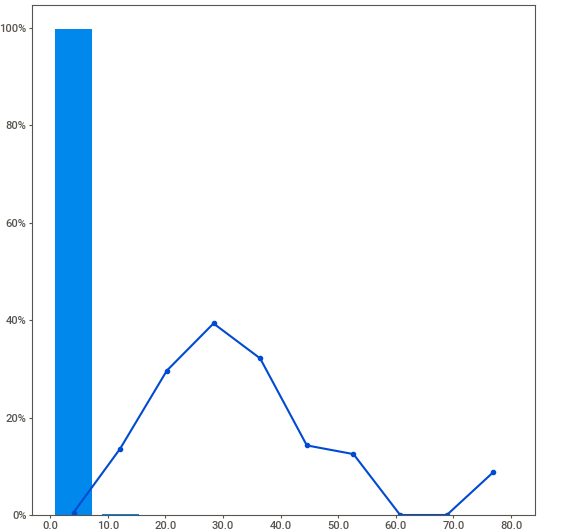
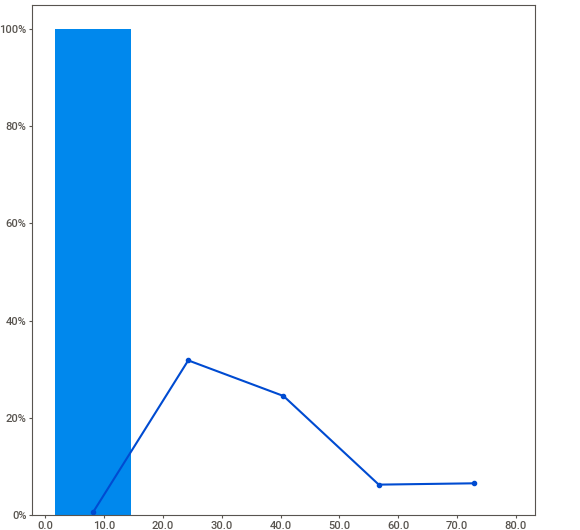
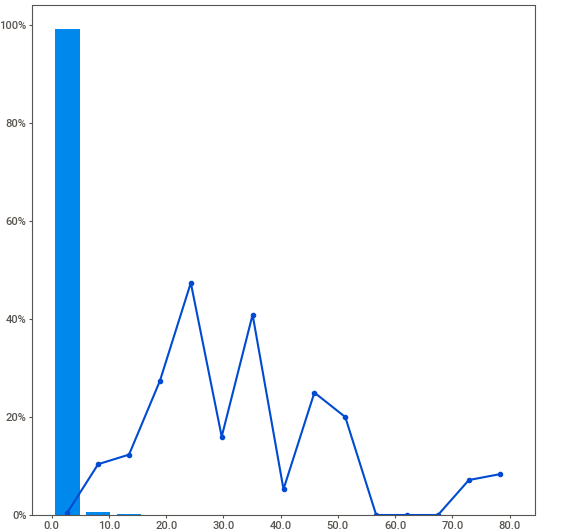
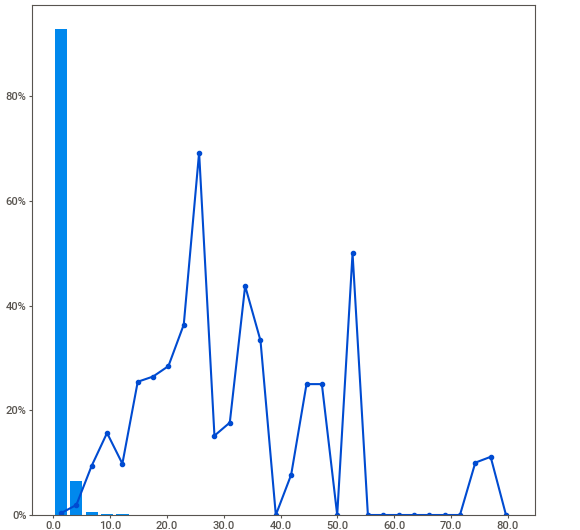
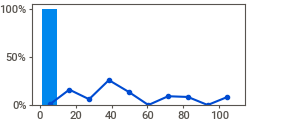
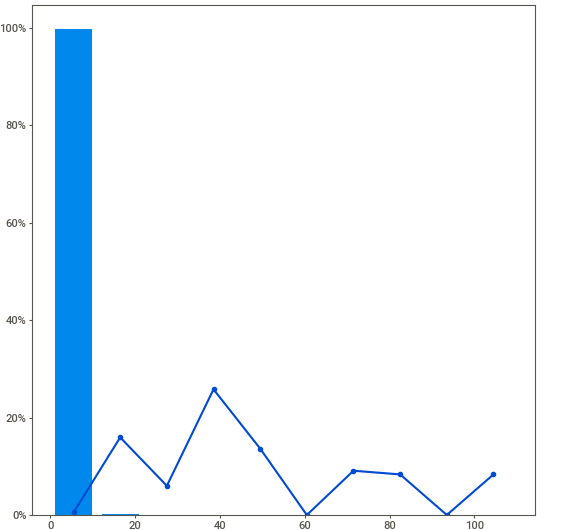
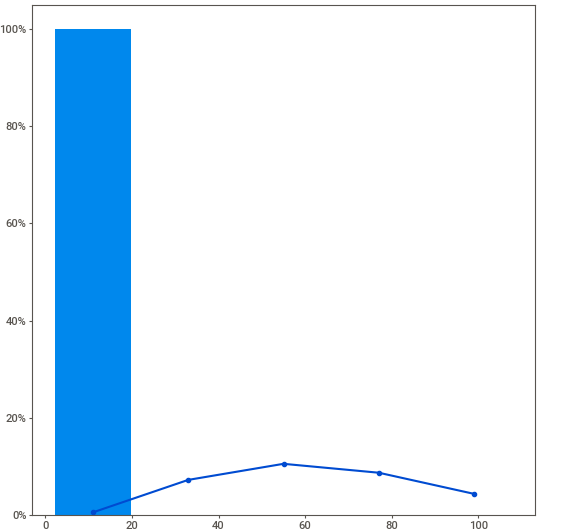
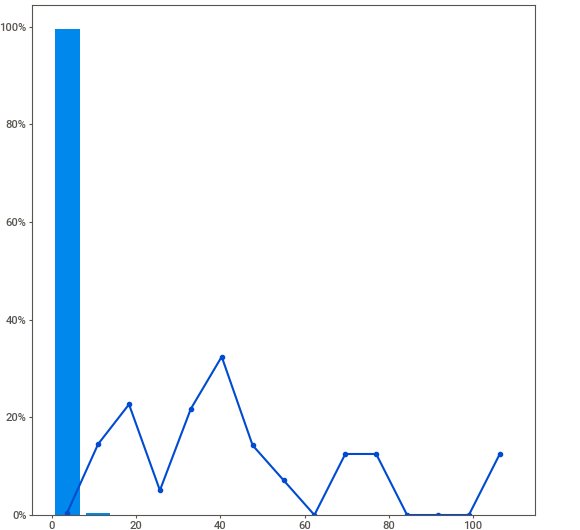
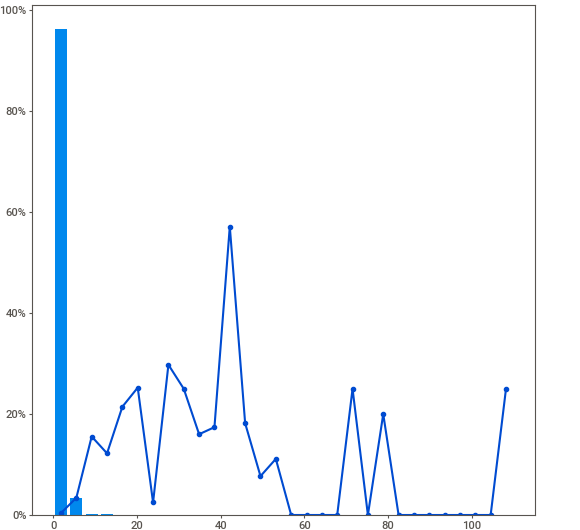
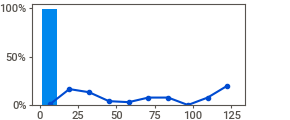
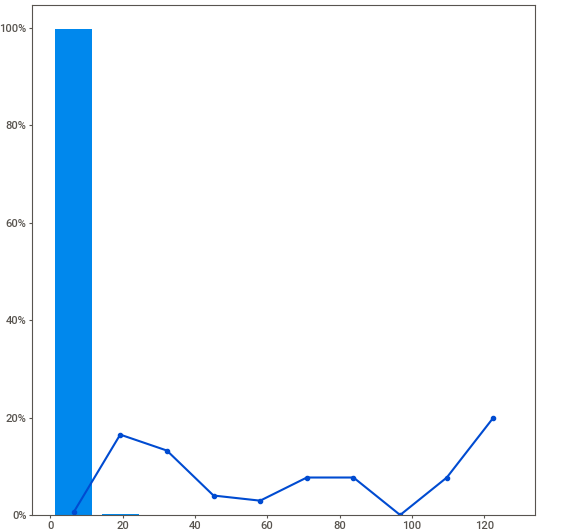
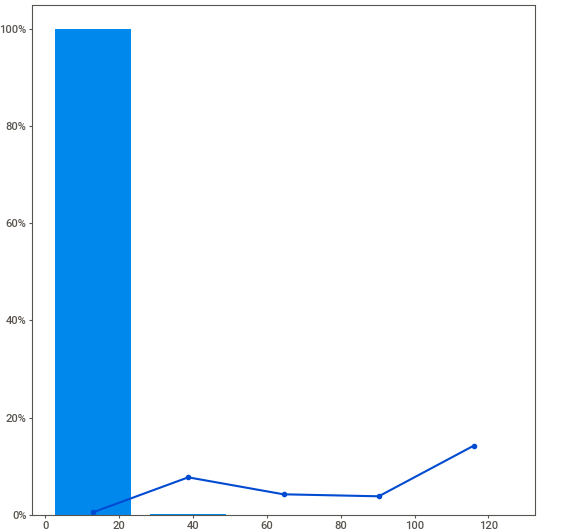
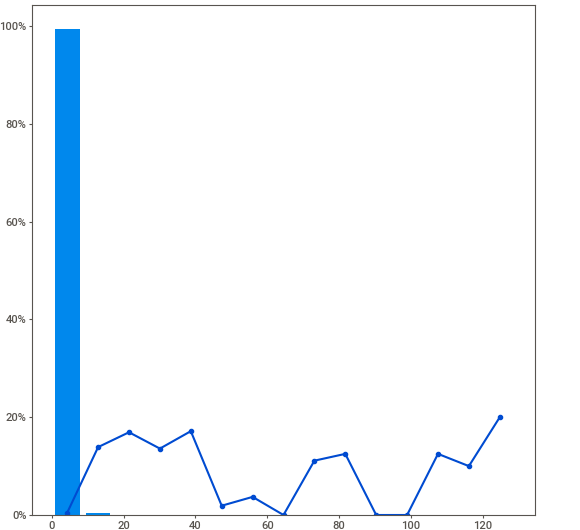
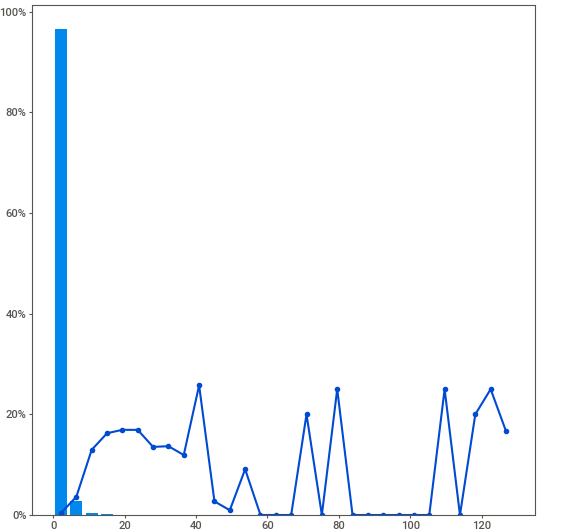
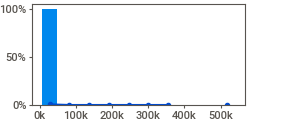
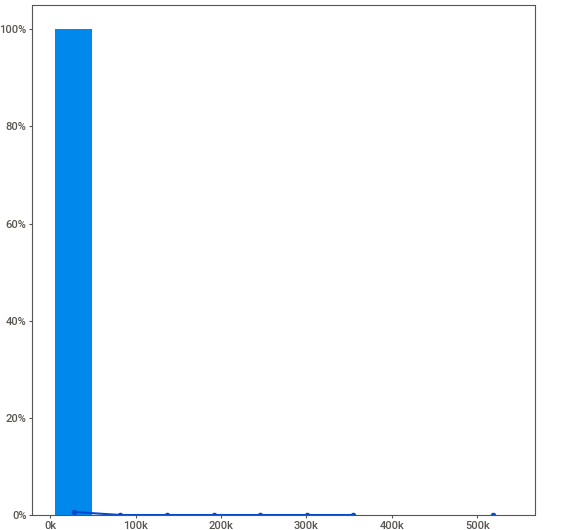
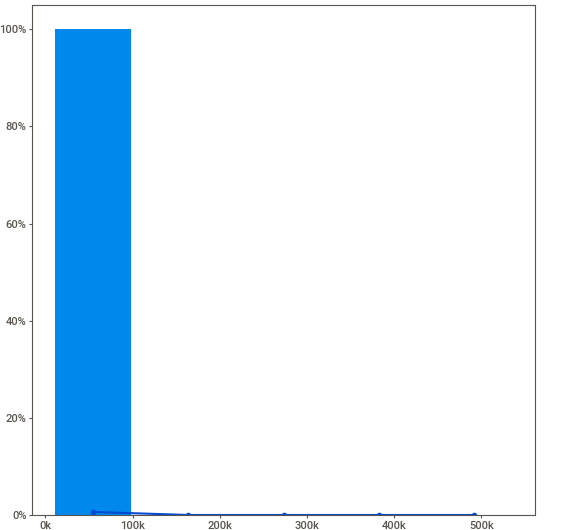
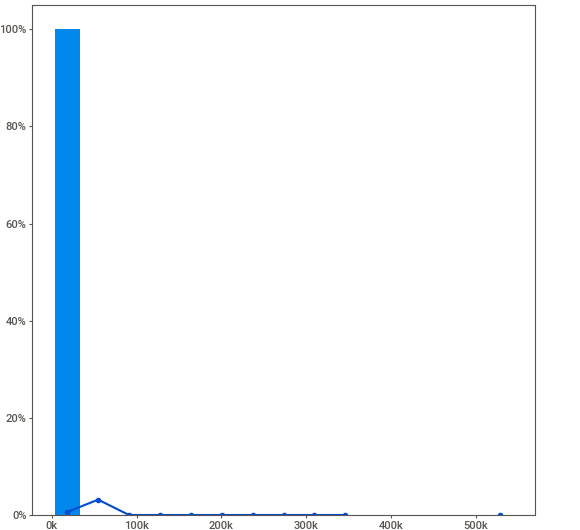
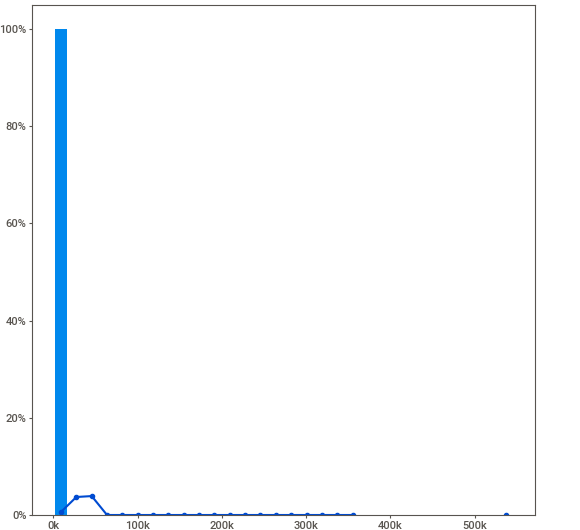
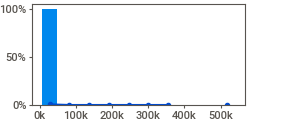
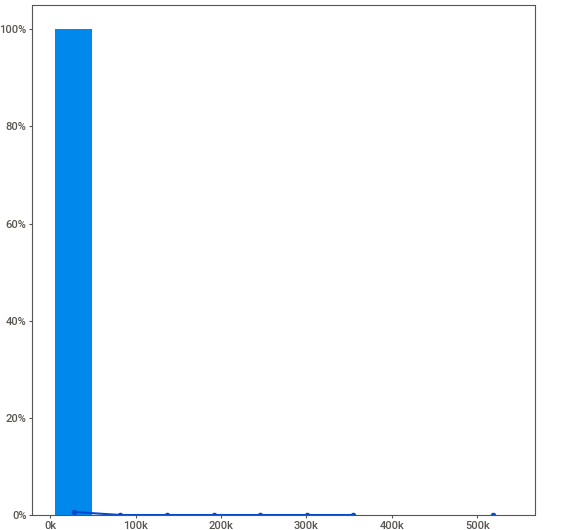
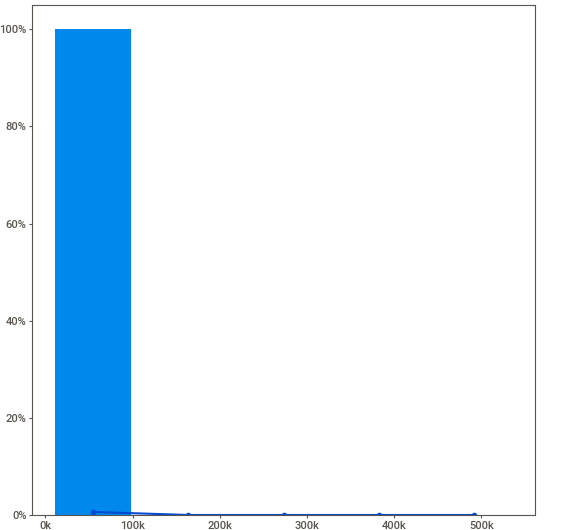
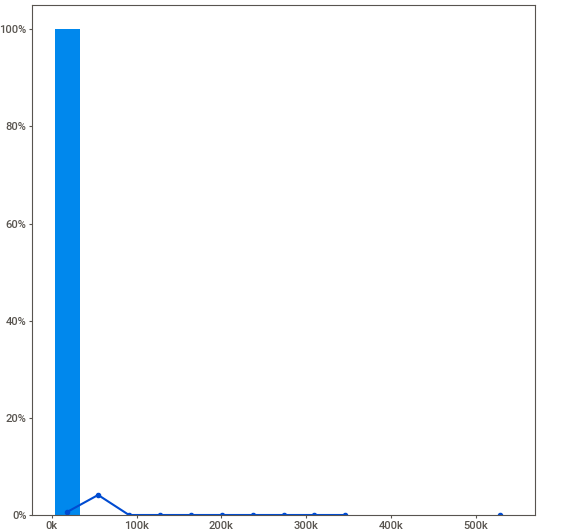
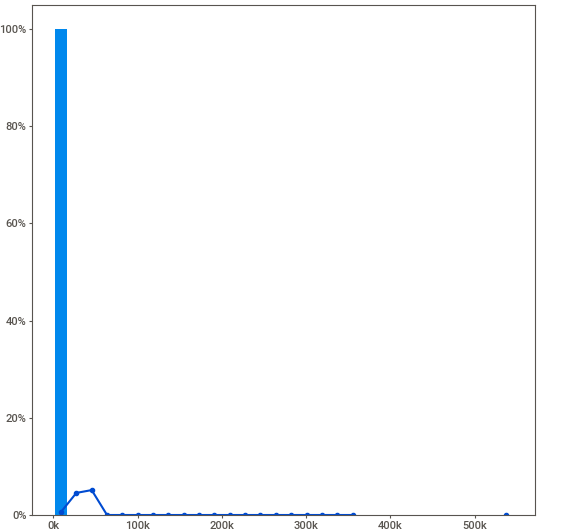
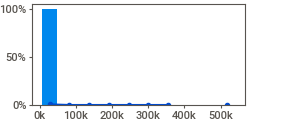
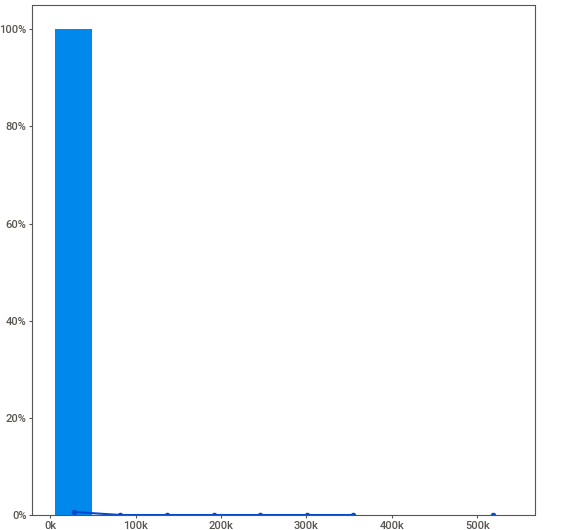
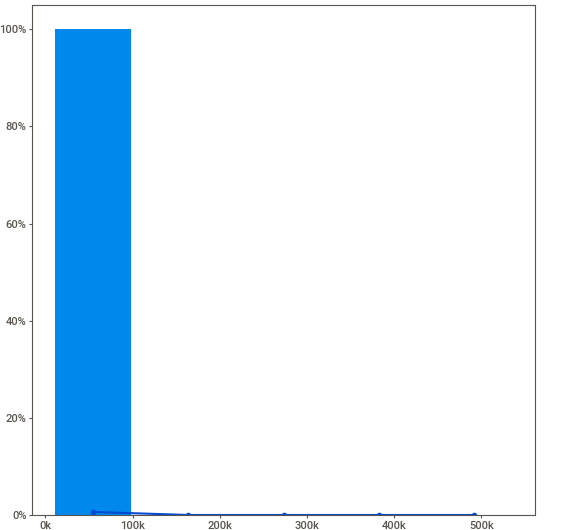
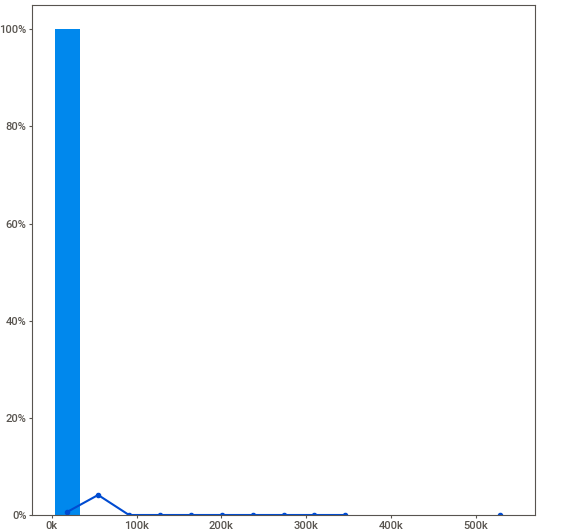
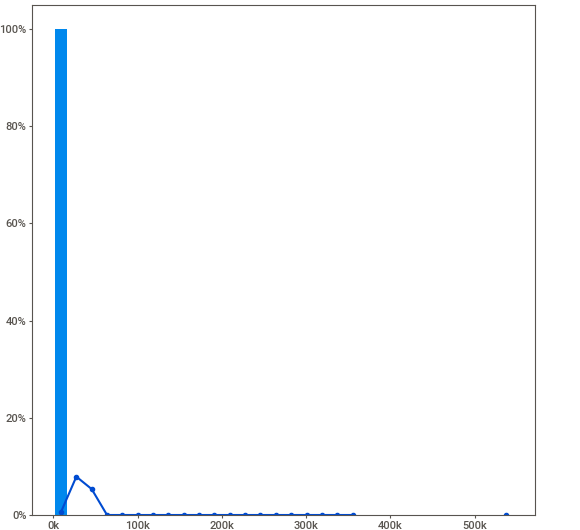
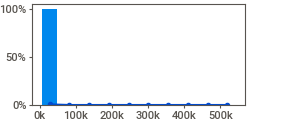
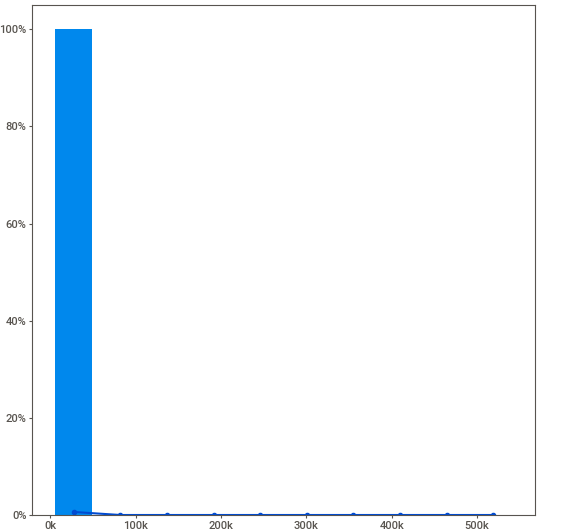
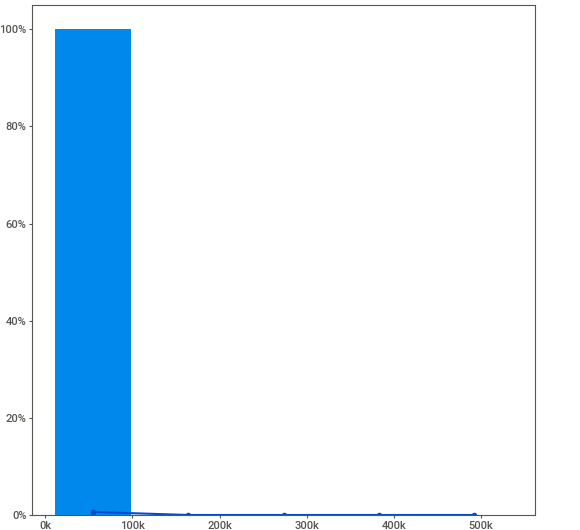
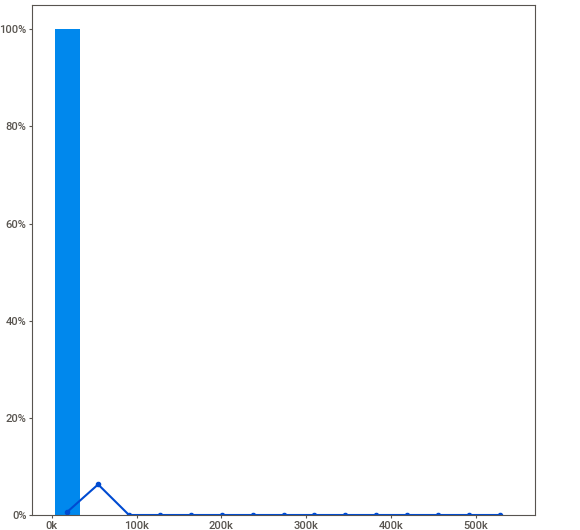
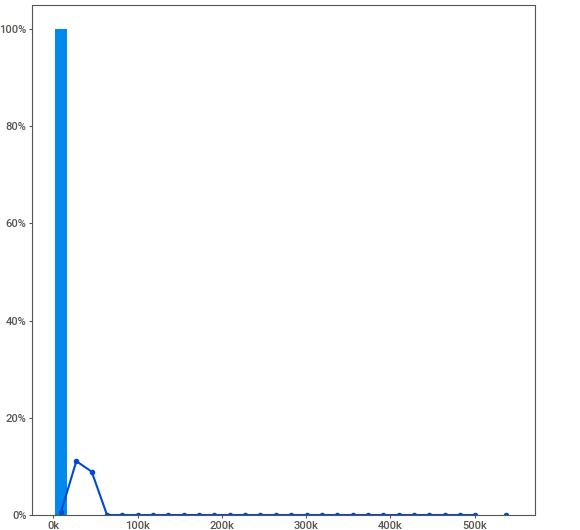
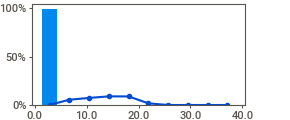
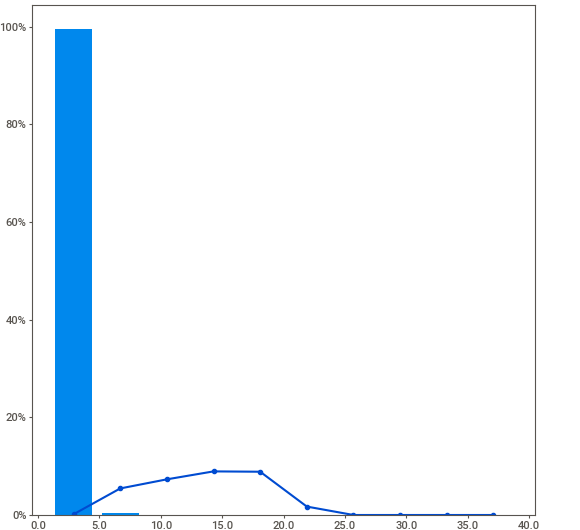
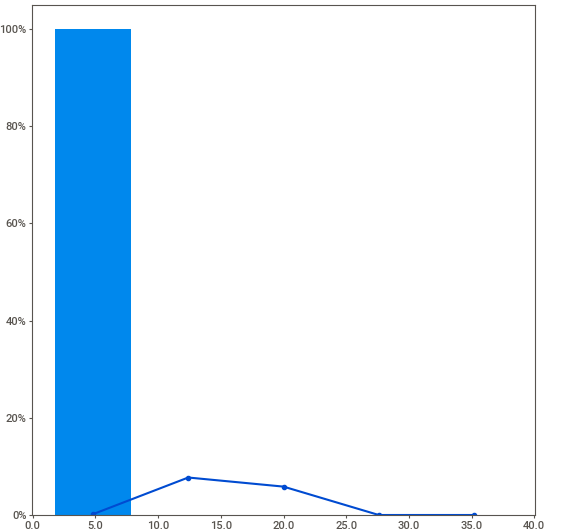
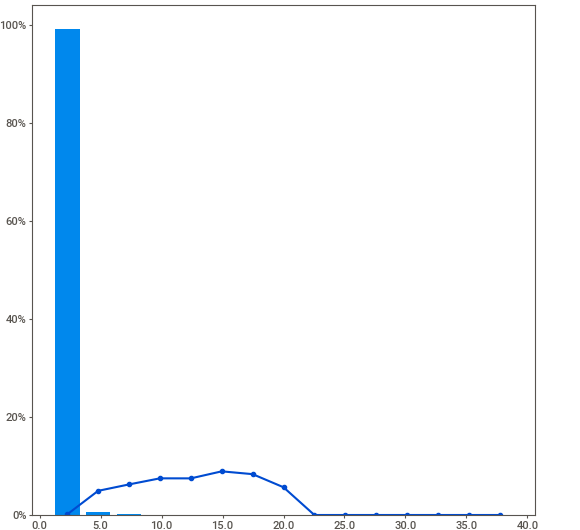
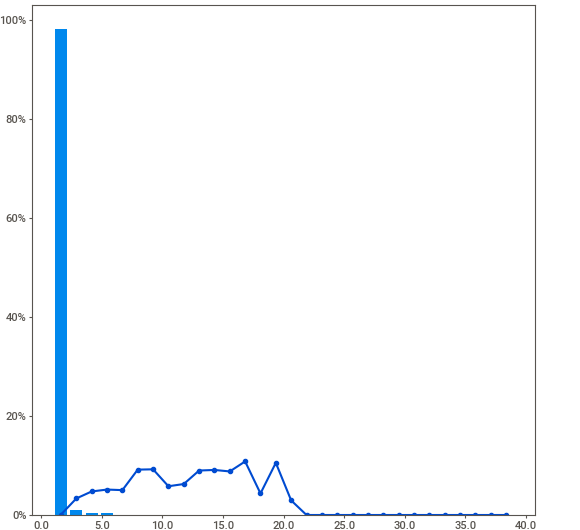
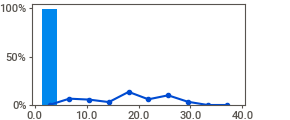
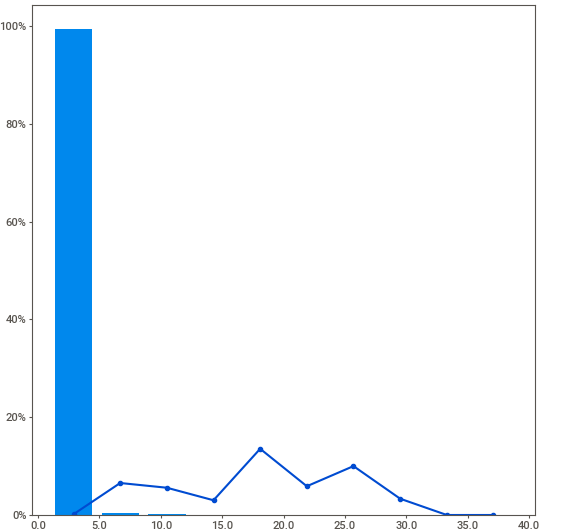
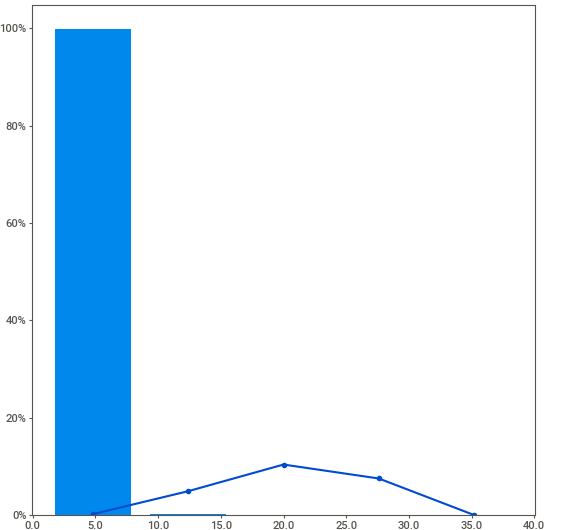
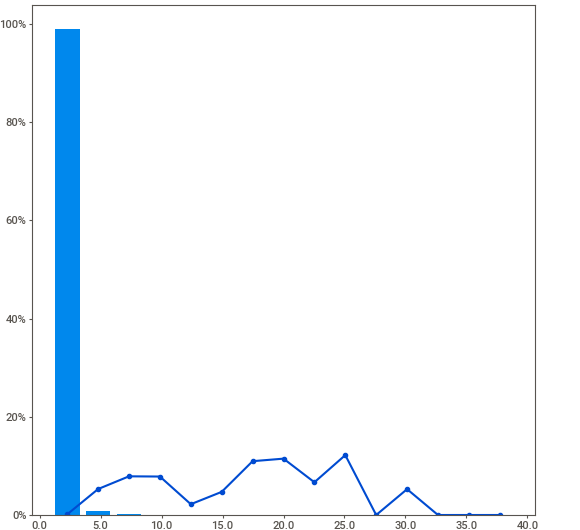
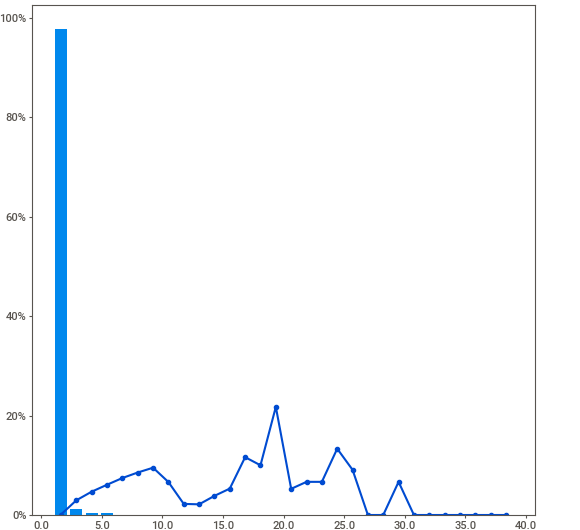
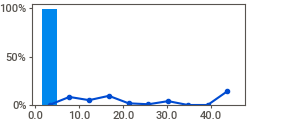
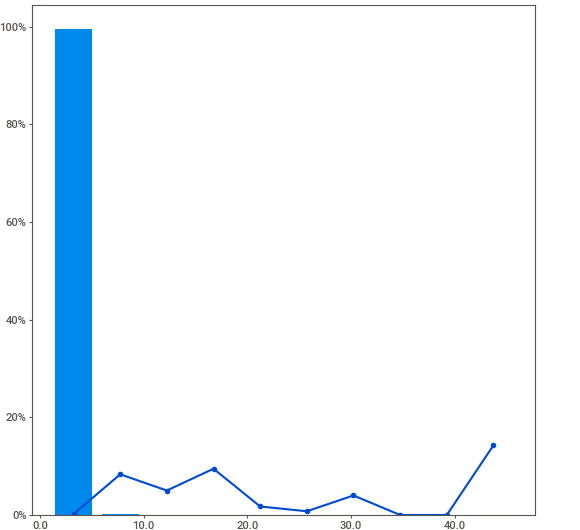
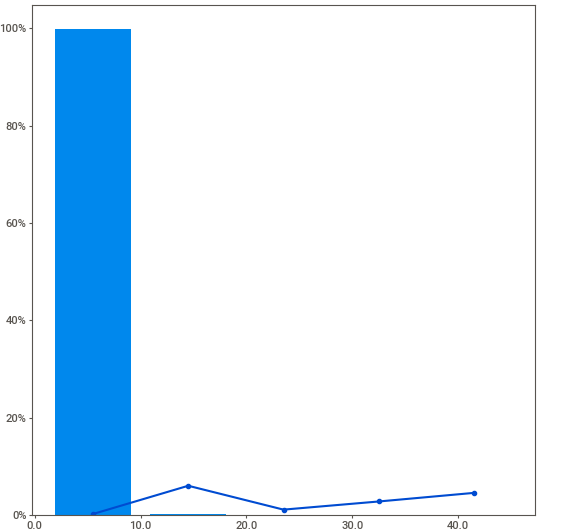
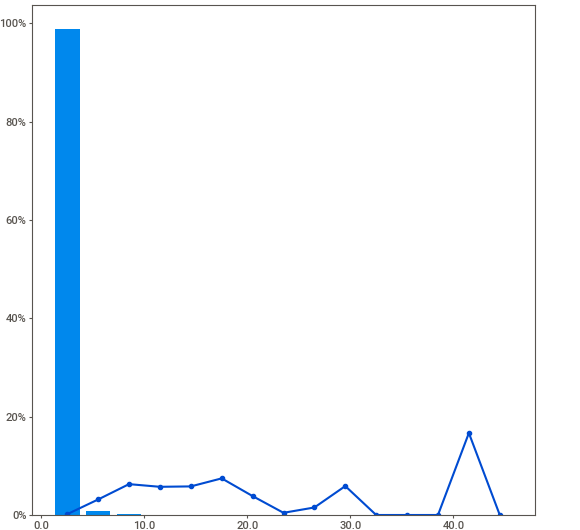
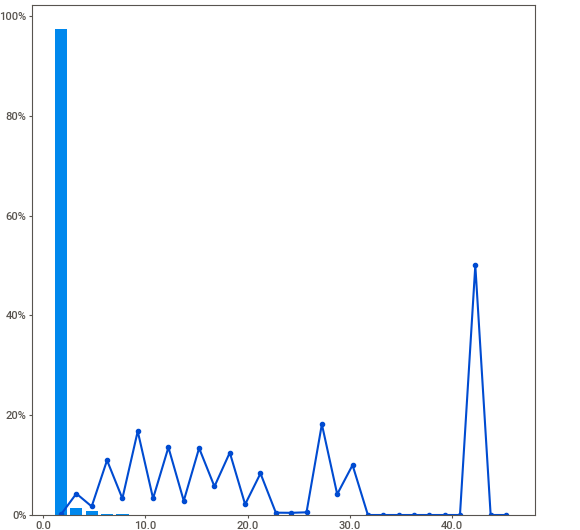
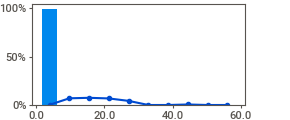
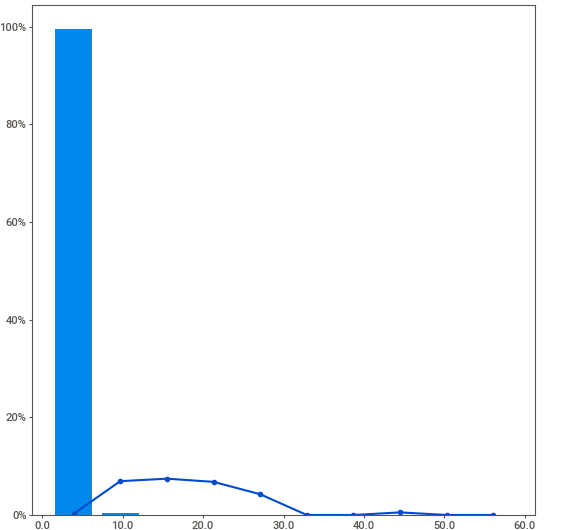
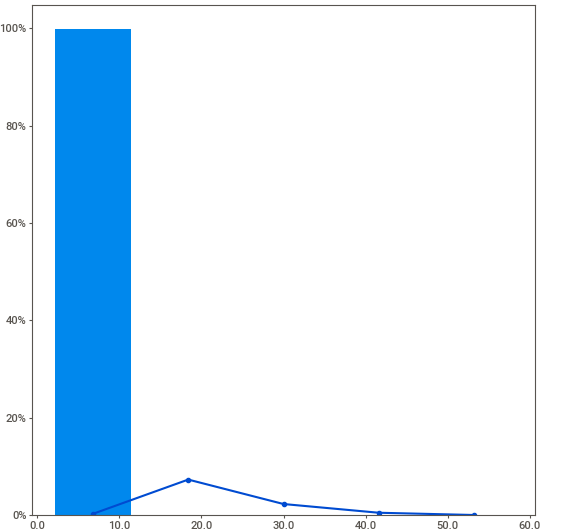
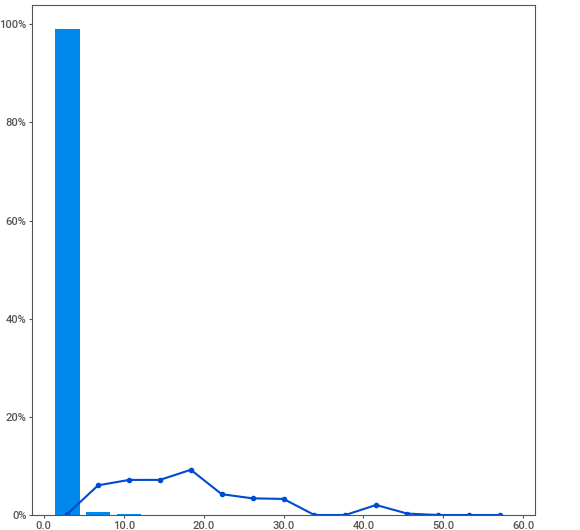
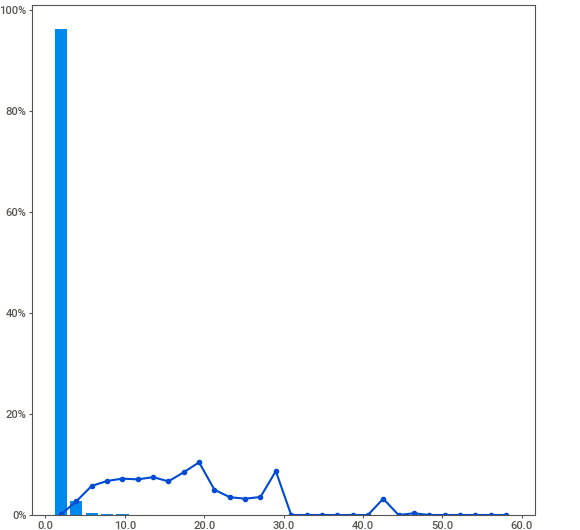
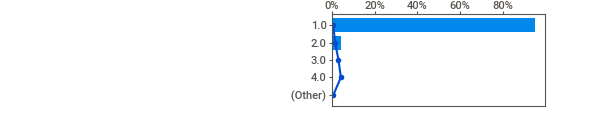
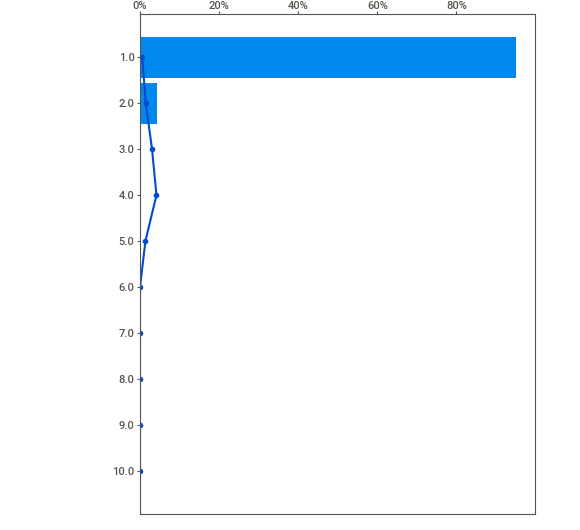
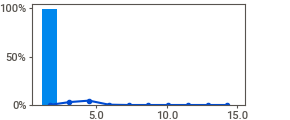
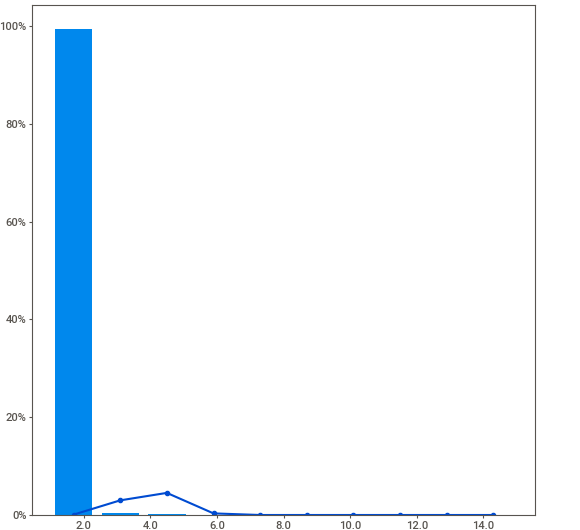
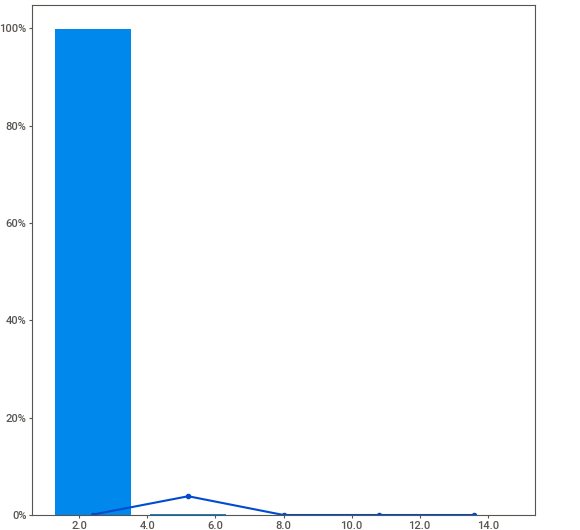
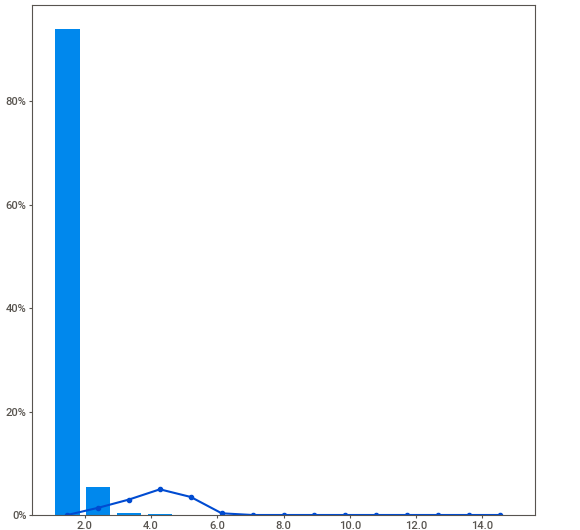
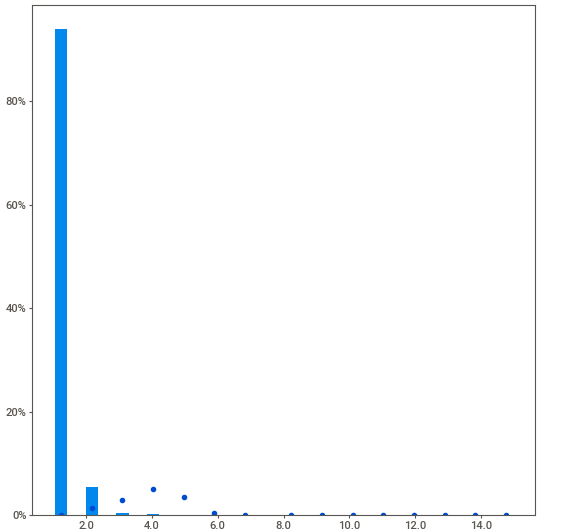
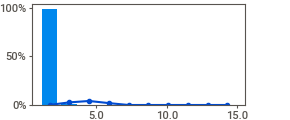
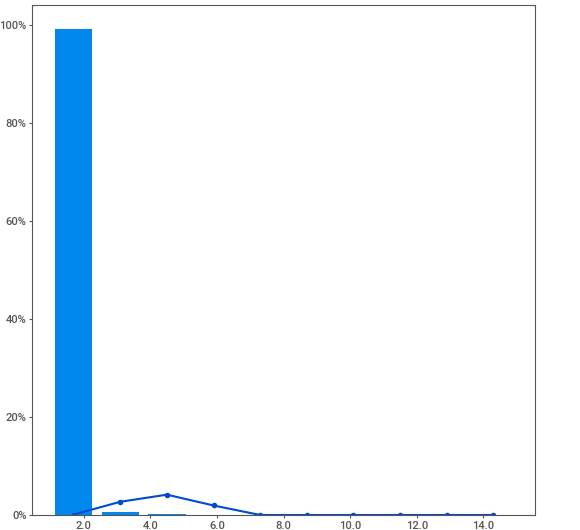
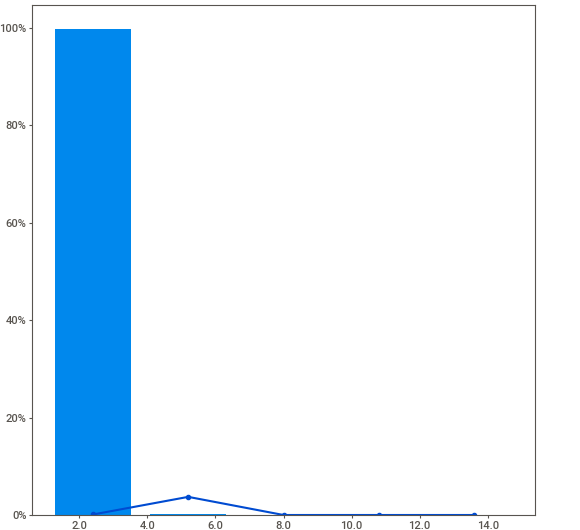
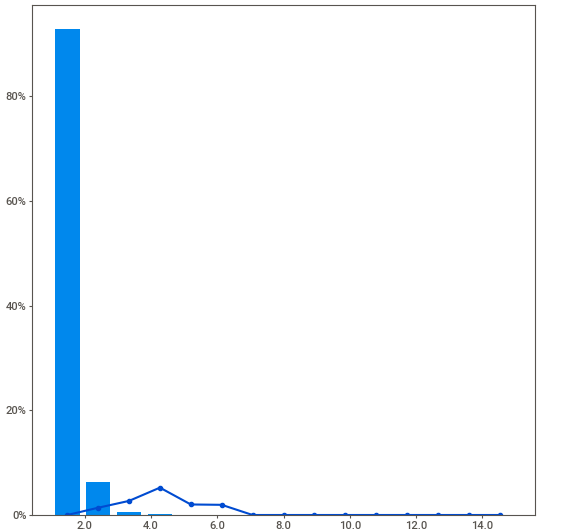
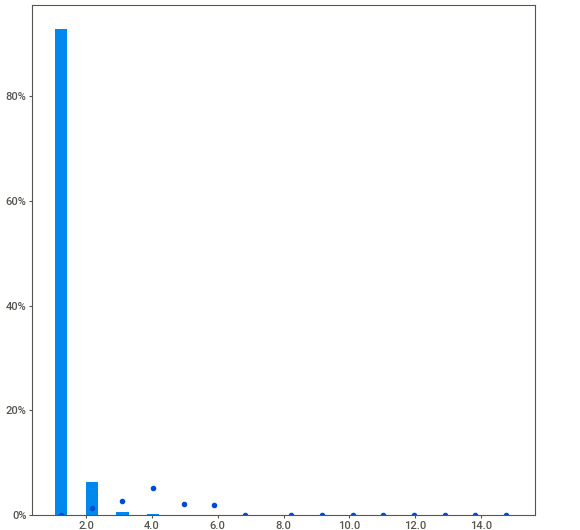
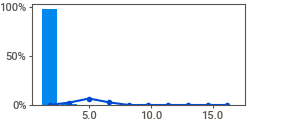
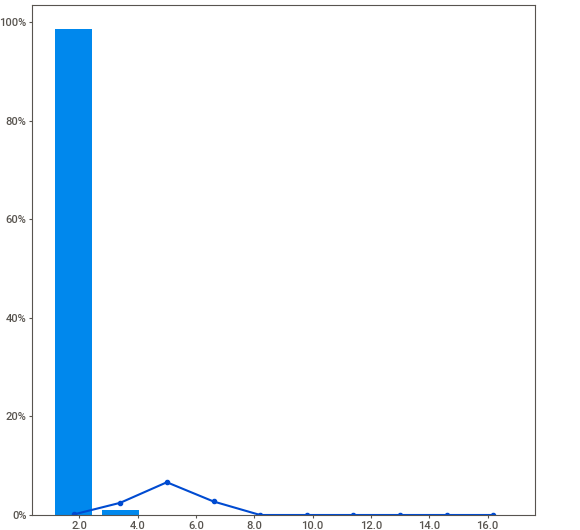
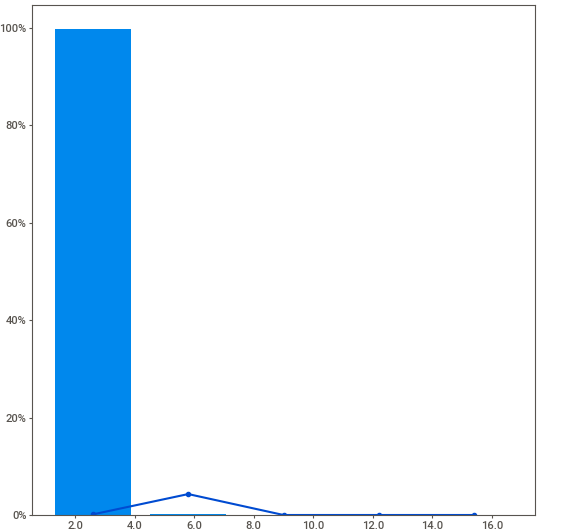
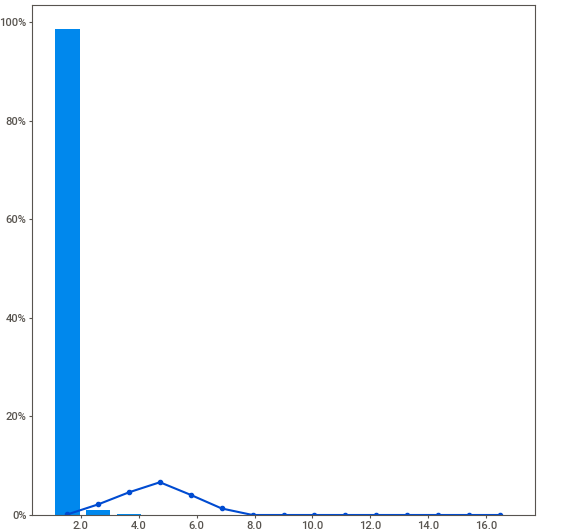
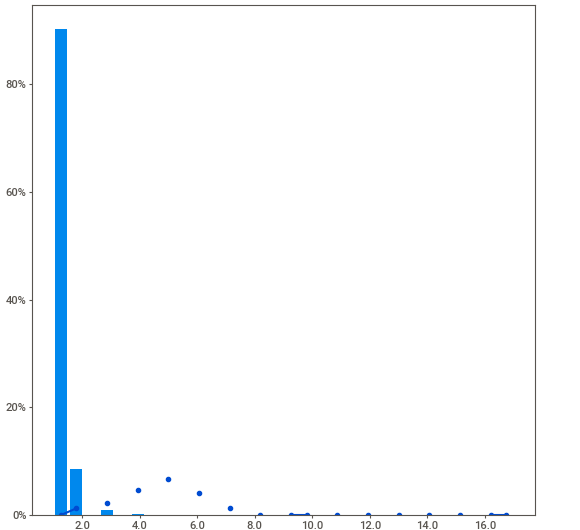
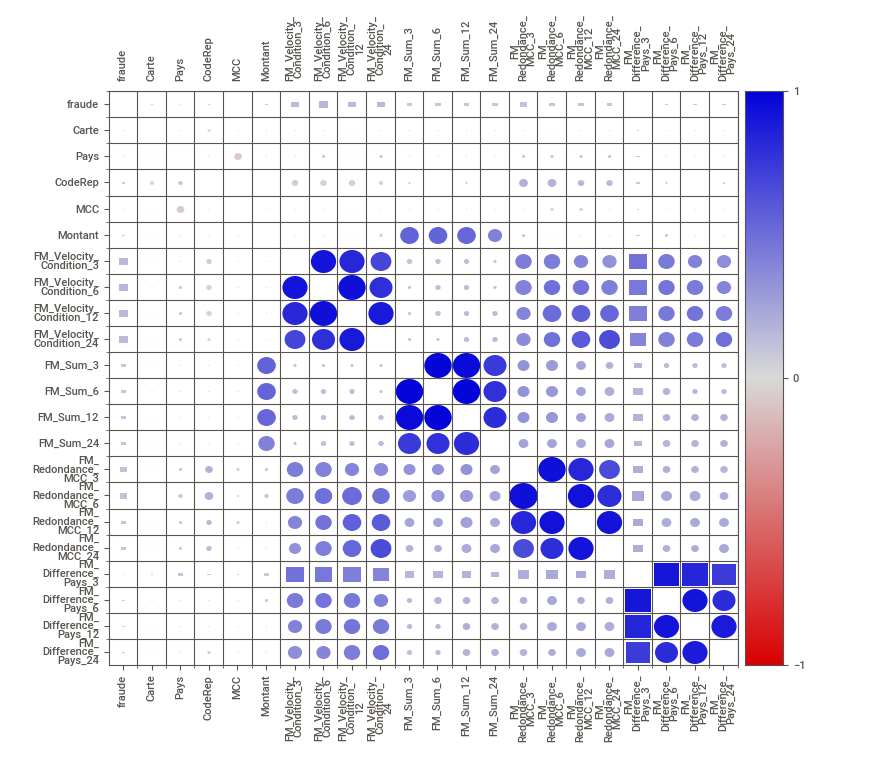
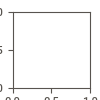

In [ ]:
viz_report = sv.analyze(df, target_feat='fraude')
viz_report.show_notebook()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1151432 entries, 0 to 1151431
Data columns (total 25 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   Carte                     1151432 non-null  float64
 1   Pays                      1151432 non-null  int64  
 2   Date                      1151432 non-null  object 
 3   Heure                     1151432 non-null  object 
 4   dateheure                 1151432 non-null  object 
 5   CodeRep                   1151432 non-null  int64  
 6   MCC                       1151432 non-null  int64  
 7   Montant                   1151432 non-null  float64
 8   fraude                    1151432 non-null  float64
 9   FM_Velocity_Condition_3   1151432 non-null  float64
 10  FM_Velocity_Condition_6   1151432 non-null  float64
 11  FM_Velocity_Condition_12  1151432 non-null  float64
 12  FM_Velocity_Condition_24  1151432 non-null  float64
 13  FM_Sum_3                  1

In [ ]:
df.drop('dateheure',axis=1,inplace=True) # duplicated column

In [ ]:
# Make sure Date column is of the right date type
def make_date(df, date_field):
    "Make sure `df[date_field]` is of the right date type."
    field_dtype = df[date_field].dtype
    if isinstance(field_dtype, pd.core.dtypes.dtypes.DatetimeTZDtype):
        field_dtype = np.datetime64
    if not np.issubdtype(field_dtype, np.datetime64):
        df[date_field] = pd.to_datetime(df[date_field], infer_datetime_format=True)

# add columns relevant to date
def add_datepart(df, field_name, prefix=None, drop=True, time=False):
    make_date(df, field_name)
    field = df[field_name]
    prefix = ifnone(prefix, re.sub('[Dd]ate$', '', field_name))
    attr = ['Year', 'Month', 'Week', 'Day', 'Dayofweek', 'Is_month_end']
    if time: attr = attr + ['Hour', 'Minute', 'Second']
    week = field.dt.isocalendar().week.astype(field.dt.day.dtype) if hasattr(field.dt, 'isocalendar') else field.dt.week
    for n in attr: df[prefix + n] = getattr(field.dt, n.lower()) if n != 'Week' else week
    mask = ~field.isna()
    if drop: df.drop(field_name, axis=1, inplace=True)
    return df

In [ ]:
df = add_datepart(df, 'Date')

In [ ]:
df['Hour'] = df.Heure.str.extract("(^\d+):", expand=False)

In [ ]:
df.drop('Heure',axis=1, inplace=True)

In [ ]:
df.head()

Carte  Pays  CodeRep   MCC  Montant  fraude  FM_Velocity_Condition_3  \
0    0.0   840       15  5812    69.25     0.0                      0.0   
1    1.0   158       15  5311     1.00     0.0                      0.0   
2    2.0   826       15  5211   516.95     0.0                      0.0   
3    3.0   840       14  7399     0.01     0.0                      0.0   
4    4.0   158       15  5311     1.00     0.0                      0.0   

   FM_Velocity_Condition_6  FM_Velocity_Condition_12  \
0                      0.0                       0.0   
1                      0.0                       0.0   
2                      0.0                       0.0   
3                      0.0                       0.0   
4                      0.0                       0.0   

   FM_Velocity_Condition_24  FM_Sum_3  FM_Sum_6  FM_Sum_12  FM_Sum_24  \
0                       0.0     69.25     69.25      69.25      69.25   
1                       0.0      1.00      1.00       1.00       1.00   
2                       0.0    516.95    516.95     516.95     516.95   
3                       0.0      0.01      0.01       0.01       0.01   
4                       0.0      1.00      1.00       1.00       1.00   

   FM_Redondance_MCC_3  FM_Redondance_MCC_6  FM_Redondance_MCC_12  \
0                  1.0                  1.0                   1.0   
1                  1.0                  1.0                   1.0   
2                  1.0                  1.0                   1.0   
3                  1.0                  1.0                   1.0   
4                  1.0                  1.0                   1.0   

   FM_Redondance_MCC_24  FM_Difference_Pays_3  FM_Difference_Pays_6  \
0                   1.0                   1.0                   1.0   
1                   1.0                   1.0                   1.0   
2                   1.0                   1.0                   1.0   
3                   1.0                   1.0                   1.0   
4                   1.0                   1.0                   1.0   

   FM_Difference_Pays_12  FM_Difference_Pays_24  Year  Month  Week  Day  \
0                    1.0                    1.0  2003     12    49    2   
1                    1.0                    1.0  2003     11    48   25   
2                    1.0                    1.0  2003     11    46   12   
3                    1.0                    1.0  2003     11    45    7   
4                    1.0                    1.0  2003     11    47   23   

   Dayofweek  Is_month_end Hour  
0          1         False   17  
1          1         False   06  
2          2         False   14  
3          4         False   03  
4          6         False   05

In [ ]:
# encoding "Is_month_end" column
label_encoder = preprocessing.LabelEncoder()

df['Is_month_end'] = label_encoder.fit_transform(df['Is_month_end']) 
df = df.dropna()

In [ ]:
# converting columns to integers
to_int = ['Carte','fraude','FM_Velocity_Condition_3','FM_Velocity_Condition_6','FM_Velocity_Condition_12','FM_Velocity_Condition_24',
         'FM_Redondance_MCC_3','FM_Redondance_MCC_6','FM_Redondance_MCC_12','FM_Redondance_MCC_24','FM_Difference_Pays_3',
         'FM_Difference_Pays_6','FM_Difference_Pays_12','FM_Difference_Pays_24', 'Hour']

for col in to_int:
    df[col] = df[col].apply(np.int64)

## EDA

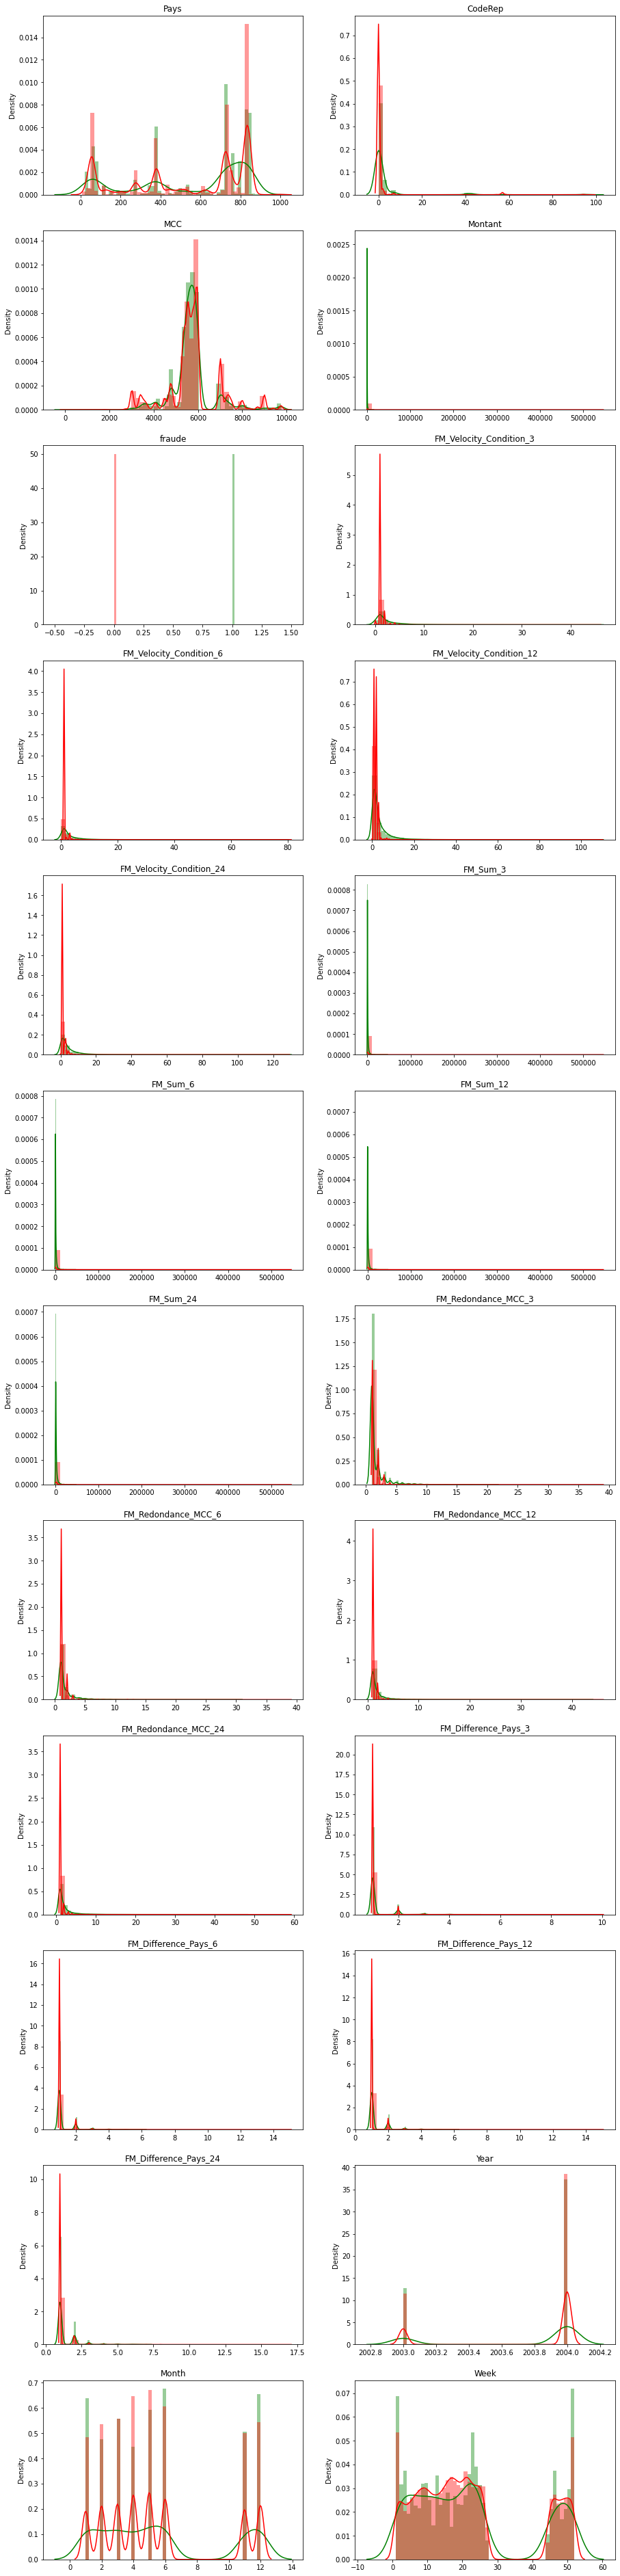

In [ ]:
#Looking the V's features
columns = df.iloc[:,1:25].columns

frauds = df.fraude == 1
normals = df.fraude == 0

grid = gridspec.GridSpec(14, 2)
plt.figure(figsize=(15,20*4))

for n, col in enumerate(df[columns]):
    ax = plt.subplot(grid[n])
    sns.distplot(df[col][frauds], bins = 50, color='g') #Will receive the "semi-salmon" violin
    sns.distplot(df[col][normals], bins = 50, color='r') #Will receive the "ocean" color
    ax.set_ylabel('Density')
    ax.set_title(str(col))
    ax.set_xlabel('')
plt.show()

In [ ]:
#Feature engineering to a better visualization of the values
df['Amount_log'] = np.log(df.Montant + 0.01)

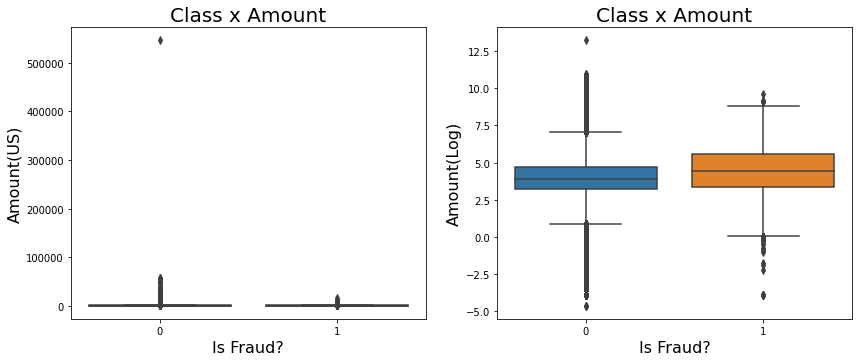

In [ ]:
plt.figure(figsize=(14,6))
#I will explore the Amount by Class and see the distribuition of Amount transactions
plt.subplot(121)
ax = sns.boxplot(x ="fraude",y="Montant",
                 data=df)
ax.set_title("Class x Amount", fontsize=20)
ax.set_xlabel("Is Fraud?", fontsize=16)
ax.set_ylabel("Amount(US)", fontsize = 16)


plt.subplot(122)
ax1 = sns.boxplot(x ="fraude",y="Amount_log", data=df)
ax1.set_title("Class x Amount", fontsize=20)
ax1.set_xlabel("Is Fraud?", fontsize=16)
ax1.set_ylabel("Amount(Log)", fontsize = 16)

plt.subplots_adjust(hspace = 0.6, top = 0.8)

plt.show()

In [ ]:
df.drop('Amount_log',axis=1,inplace=True) # on enleve la colonne que nous venons de crééer

Le montant des transactions frauduleuses est toujours plus élevé que celui des transactions non frauduleuses.

On constate visuellement que le montant moyen des transactions frauduleuses est toujours plus élevé que celui des transactions normales. 

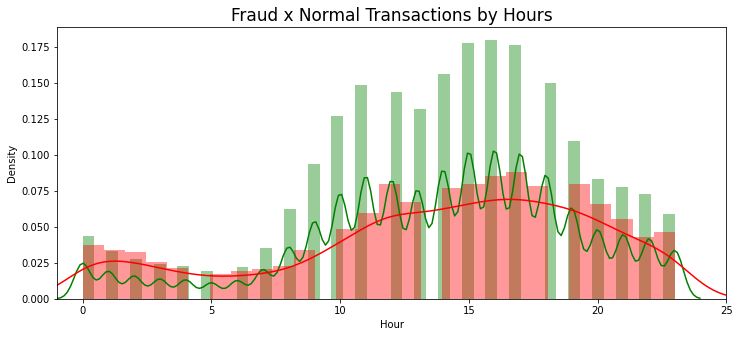

In [ ]:
#Exploring the distribuition by Class types throught hours
plt.figure(figsize=(12,5))
sns.distplot(df[df['fraude'] == 0]["Hour"], 
             color='g')
sns.distplot(df[df['fraude'] == 1]["Hour"], 
             color='r')
plt.title('Fraud x Normal Transactions by Hours', fontsize=17)
plt.xlim([-1,25])
plt.show()

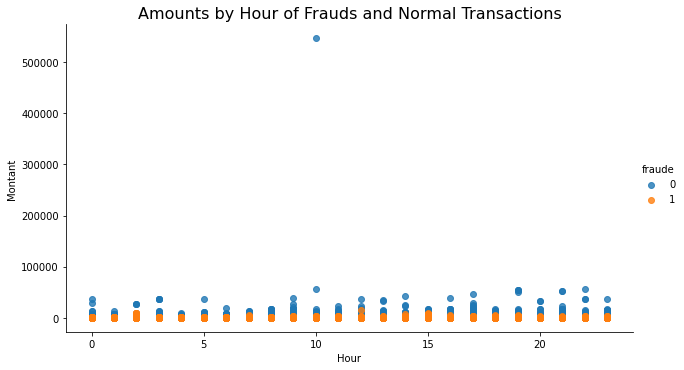

In [ ]:
#Looking the Amount and time distribuition of FRAUD transactions
ax = sns.lmplot(y="Montant", x="Hour", fit_reg=False,aspect=1.8,
                data=df, hue='fraude')
plt.title("Amounts by Hour of Frauds and Normal Transactions",fontsize=16)
plt.show()

## Correlation

In [ ]:
corr_matrix = df.corr()
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(np.bool))

def top_correlation(df,n):
    correlation = upper_tri.stack().sort_values(ascending=False)
    correlation = pd.DataFrame(correlation).reset_index()
    correlation.columns=["Variable 1","Variable 2","Correlation"]
    correlation = correlation.reindex(correlation.Correlation.abs().sort_values(ascending=False).index).reset_index().drop(["index"],axis=1)
    return correlation.head(n)

top_correlation(df,10)

Variable 1                Variable 2  Correlation
0                 FM_Sum_3                  FM_Sum_6     0.986165
1                 FM_Sum_6                 FM_Sum_12     0.984524
2                 FM_Sum_3                 FM_Sum_12     0.965925
3      FM_Redondance_MCC_3       FM_Redondance_MCC_6     0.938014
4  FM_Velocity_Condition_6  FM_Velocity_Condition_12     0.933532
5      FM_Redondance_MCC_6      FM_Redondance_MCC_12     0.928384
6     FM_Difference_Pays_6     FM_Difference_Pays_12     0.922671
7                    Month                      Week     0.922550
8     FM_Redondance_MCC_12      FM_Redondance_MCC_24     0.918083
9  FM_Velocity_Condition_3   FM_Velocity_Condition_6     0.916418

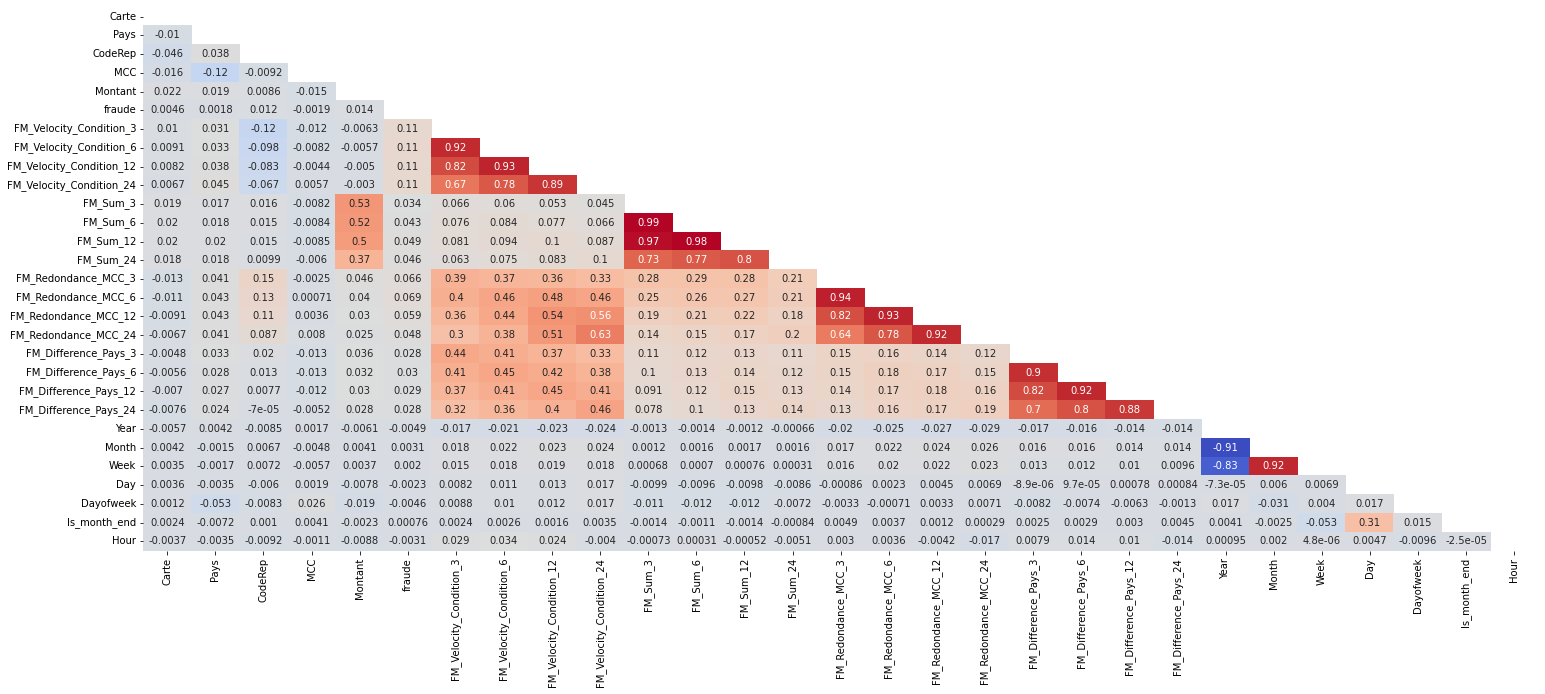

In [ ]:
# CORRELATION MATRIX
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(25,10))
sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="coolwarm", cbar=False,
            mask=np.triu(np.ones_like(corrmat, dtype = bool)));

- 'FM_*' : suppression des observations incoherentes (~2%) ou le nombre de transactions realisees par exemple sur les 24 dernieres heures est inferieur au nombre de transactions effectuees sur les 12 dernieres heures.

Toutes les variables FM_* sont evidemment tres correlees les unes avec les autres car elles comprennent les transactions des periodes inferieures.
Pour remedier a ce probleme, nous pouvons deduire de chaque periode le cumul des periodes inferieures.

Nous n'avons ainsi plus que les variables 'Mois' et 'Annee' ayant toujours une correlation elevee.



Nous faisons le choix de garder la variable 'Mois' au depend de la variable 'Annee'. La periode de l'annee pourrait a priori avoir plus de signifiance que l'annee que l'on est en train de regarder.

In [ ]:
df_K = df.copy()

df_K = df_K.drop(df_K[df_K['FM_Velocity_Condition_3'] > df_K['FM_Velocity_Condition_6']].index)
df_K = df_K.drop(df_K[df_K['FM_Velocity_Condition_6'] > df_K['FM_Velocity_Condition_12']].index)
df_K = df_K.drop(df_K[df_K['FM_Velocity_Condition_12'] > df_K['FM_Velocity_Condition_24']].index)

df_K = df_K.drop(df_K[df_K['FM_Sum_3'] > df_K['FM_Sum_6']].index)
df_K = df_K.drop(df_K[df_K['FM_Sum_6'] > df_K['FM_Sum_12']].index)
df_K = df_K.drop(df_K[df_K['FM_Sum_12'] > df_K['FM_Sum_24']].index)

df_K = df_K.drop(df_K[df_K['FM_Redondance_MCC_3'] > df_K['FM_Redondance_MCC_6']].index)
df_K = df_K.drop(df_K[df_K['FM_Redondance_MCC_6'] > df_K['FM_Redondance_MCC_12']].index)
df_K = df_K.drop(df_K[df_K['FM_Redondance_MCC_12'] > df_K['FM_Redondance_MCC_24']].index)

df_K = df_K.drop(df_K[df_K['FM_Difference_Pays_3'] > df_K['FM_Difference_Pays_6']].index)
df_K = df_K.drop(df_K[df_K['FM_Difference_Pays_6'] > df_K['FM_Difference_Pays_12']].index)
df_K = df_K.drop(df_K[df_K['FM_Difference_Pays_12'] > df_K['FM_Difference_Pays_24']].index)

df_K['FM_Velocity_Condition_24'] -= df_K['FM_Velocity_Condition_12']
df_K['FM_Velocity_Condition_12'] -= df_K['FM_Velocity_Condition_6']
df_K['FM_Velocity_Condition_6'] -= df_K['FM_Velocity_Condition_3']

df_K['FM_Sum_24'] -= df_K['FM_Sum_12']
df_K['FM_Sum_12'] -= df_K['FM_Sum_6']
df_K['FM_Sum_6'] -= df_K['FM_Sum_3']

df_K['FM_Redondance_MCC_24'] -= df_K['FM_Redondance_MCC_12']
df_K['FM_Redondance_MCC_12'] -= df_K['FM_Redondance_MCC_6']
df_K['FM_Redondance_MCC_6'] -= df_K['FM_Redondance_MCC_3']

df_K['FM_Difference_Pays_24'] -= df_K['FM_Difference_Pays_12']
df_K['FM_Difference_Pays_12'] -= df_K['FM_Difference_Pays_6']
df_K['FM_Difference_Pays_6'] -= df_K['FM_Difference_Pays_3']

In [ ]:
df_K.drop(["Year","Week"], axis=1, inplace=True) # fraude est légèrement + corrélée à Month

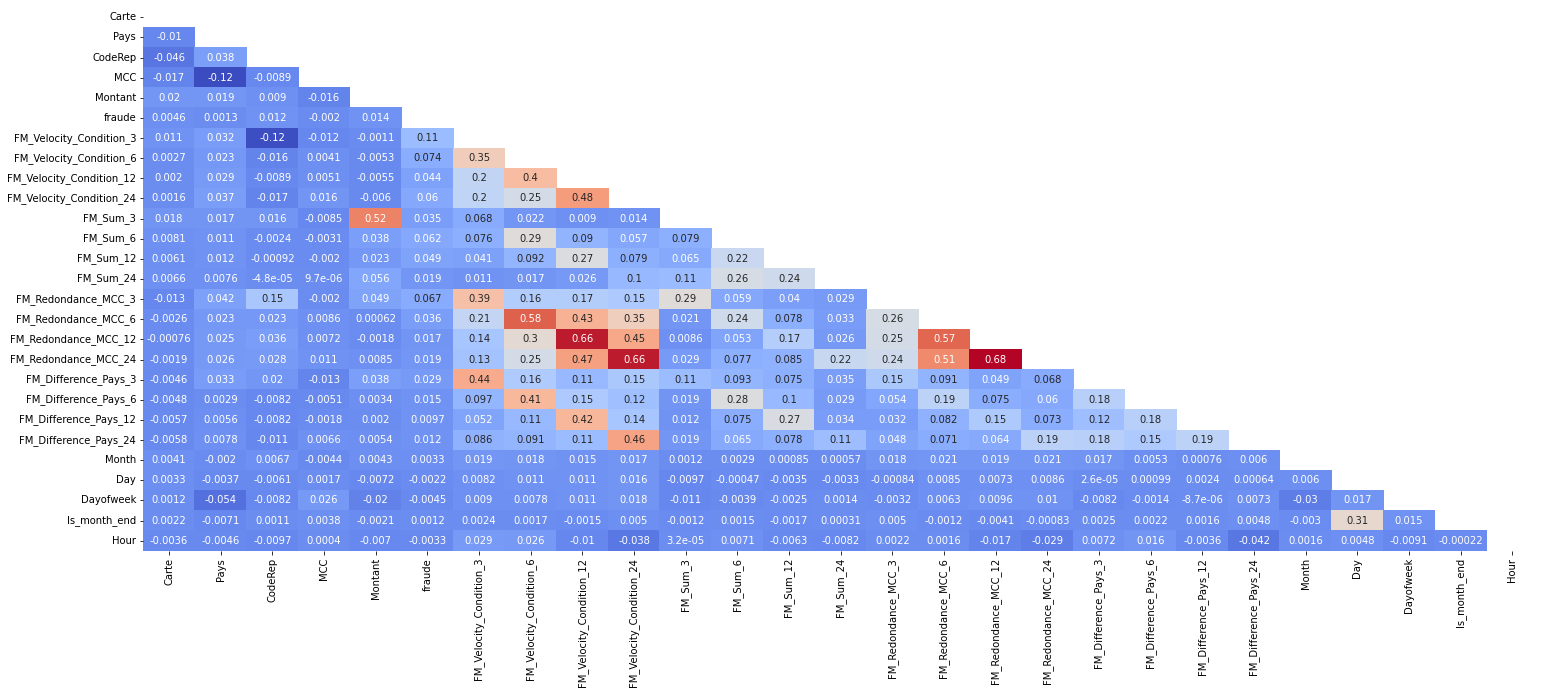

In [ ]:
# CORRELATION MATRIX AFTER
corrmat = df_K.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(25,10))
sns.heatmap(df_K[top_corr_features].corr(),annot=True,cmap="coolwarm", cbar=False,
            mask=np.triu(np.ones_like(corrmat, dtype = bool)));

In [ ]:
corr_matrix = df_K.corr()
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(np.bool))

def top_correlation(df,n):
    correlation = upper_tri.stack().sort_values(ascending=False)
    correlation = pd.DataFrame(correlation).reset_index()
    correlation.columns=["Variable 1","Variable 2","Correlation"]
    correlation = correlation.reindex(correlation.Correlation.abs().sort_values(ascending=False).index).reset_index().drop(["index"],axis=1)
    return correlation.head(n)

top_correlation(df_K,10)

Variable 1                Variable 2  Correlation
0      FM_Redondance_MCC_12      FM_Redondance_MCC_24     0.680963
1  FM_Velocity_Condition_24      FM_Redondance_MCC_24     0.662627
2  FM_Velocity_Condition_12      FM_Redondance_MCC_12     0.662497
3   FM_Velocity_Condition_6       FM_Redondance_MCC_6     0.578124
4       FM_Redondance_MCC_6      FM_Redondance_MCC_12     0.571113
5                   Montant                  FM_Sum_3     0.521924
6       FM_Redondance_MCC_6      FM_Redondance_MCC_24     0.511143
7  FM_Velocity_Condition_12  FM_Velocity_Condition_24     0.475710
8  FM_Velocity_Condition_12      FM_Redondance_MCC_24     0.467309
9  FM_Velocity_Condition_24     FM_Difference_Pays_24     0.458399

## Target

In [ ]:
#To clearly the data of frauds and no frauds
print(f"Fraud transactions statistics\n{df[df['fraude'] == 1]['Montant'].describe()}\n\nNon-Fraud transactions statistics\n{df[df['fraude'] == 0]['Montant'].describe()}")

Fraud transactions statistics
count     7246.000000
mean       258.488310
std        581.964935
min          0.010000
25%         28.992500
50%         82.260000
75%        268.980000
max      15000.000000
Name: Montant, dtype: float64

Non-Fraud transactions statistics
count    1.144186e+06
mean     1.412204e+02
std      6.787689e+02
min      0.000000e+00
25%      2.450000e+01
50%      4.832000e+01
75%      1.142800e+02
max      5.463822e+05
Name: Montant, dtype: float64


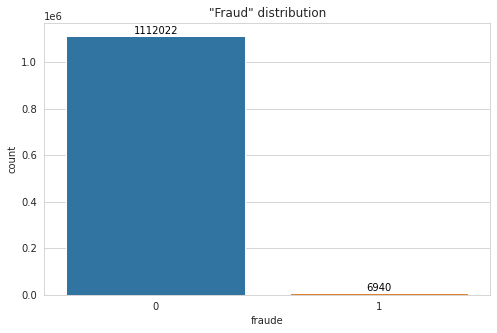

In [ ]:
# Fraud distribution
sns.set_style('whitegrid')
plt.figure(figsize=(8,5))
ax = sns.countplot(df_K['fraude'])
for p in ax.patches:
             ax.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                 textcoords='offset points')
plt.title('"Fraud" distribution');

## Train Validation Test split

In [ ]:
df_train, df_rem = train_test_split(df_K,train_size=0.9,stratify=df_K.fraude,random_state=16)
df_valid, df_test = train_test_split(df_rem,test_size=0.5,stratify=df_rem.fraude,random_state=16)


X_train = df_train.drop('fraude',axis=1)
y_train = df_train['fraude']

X_valid = df_valid.drop('fraude',axis=1)
y_valid = df_valid['fraude']

X_test = df_test.drop('fraude',axis=1)
y_test = df_test['fraude']

## Selection de variables

In [ ]:
# UNIVARIATE SELECTION
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Feature extraction - 8 best features
best_features = SelectKBest(score_func=chi2, k=8)
fit = best_features.fit(X_train,y_train)

In [ ]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_train.columns)

In [ ]:
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Features','Score']

In [ ]:
# 8 best features
print(featureScores.nlargest(8,'Score')) # the highest the score, the more important the features are.

                    Features         Score
12                 FM_Sum_24  1.371845e+07
9                   FM_Sum_3  1.308991e+07
10                  FM_Sum_6  1.199897e+07
11                 FM_Sum_12  9.257926e+06
0                      Carte  8.023849e+05
4                    Montant  6.356008e+05
8   FM_Velocity_Condition_24  1.733154e+04
6    FM_Velocity_Condition_6  1.725200e+04


In [ ]:
# FEATURE IMPORTANCE (using Tree Based Classifier)
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X_train,y_train)
print(model.feature_importances_)

[0.09961416 0.07904842 0.02866084 0.08192743 0.09446893 0.04445977
 0.01823061 0.01476751 0.02866563 0.10211534 0.02968938 0.02399182
 0.03911151 0.02011483 0.0073416  0.00679352 0.01166663 0.01218281
 0.00554589 0.00442098 0.00793803 0.04635969 0.0665566  0.04804324
 0.00375602 0.07452881]


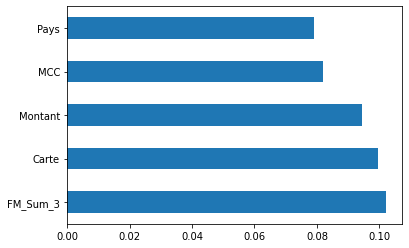

In [ ]:
feat_imp = pd.Series(model.feature_importances_,index=X_train.columns)
feat_imp.nlargest().plot(kind='barh');

In [ ]:
# Permutation Feature Importance (sklearn) : will be seen later in the modeling part.

## Feature scaling

**1. MaxAbsScaler() :**
- scattered/messy values + lots of outliers (other techniques erase the impact of outliers).

**2. MinMaxScaler()** - Normalization :
$$X_{norm} = \frac{x_i - min(x)}{max(x) - min(x)}$$
- Uses min-max.
- Calibrates the data to a range of values.

**3. RobustScaler() :**
$$\frac{x_i - Q_1(x)}{Q_3(x) - Q_1(x)}$$
- Uses the interquantile interval.
- More reliable against outliers.
($Q_1$ : 25%, $Q_2$ : 75%)

**4. StandardScaler()** - Standardization :
$$\frac{x_i - mean(x)}{sd(x)}$$
- Assumes data is normally distributed.


Feature scaling is not necessary for non-linear algorithms, but we are going to apply it to all our algorithmes though.

In [ ]:
# normalisation des données
sc = MinMaxScaler() 
X_train_sc = sc.fit_transform(X_train)
X_valid_sc = sc.transform(X_valid)
X_test_sc = sc.transform(X_test)

### Algorithmes classiques

Before using basic ML algorithmes, we will resample our data as it is very imbalanced.

We will focus on 3 metrics that are best suited for unbalanced data:
- Recall
- F2-score
- Matthew's Correlation Coefficient (MCC)

NOTA : we will oversample our data only for the classic algorithms, later on we will use some more sophisticated techniques which won't require resampling.

In [ ]:
# Random Oversampler
os = RandomOverSampler(sampling_strategy=0.7)
X_train_ros, y_train_ros = os.fit_resample(X_train_sc,y_train)
print('Original dataset shape {}'.format(Counter(y_train)))
print('Resampled dataset shape {}'.format(Counter(y_train_ros)))
# la classe minoritaire devient (ratio) de la classe majoritaire.

In [ ]:
# Apprentissage des modèles

# Logistic Regression
logit = LogisticRegression(
    penalty='l2',
    solver='liblinear',
    C=1,
    random_state=16,
    max_iter=100,
).fit(X_train_ros, y_train_ros)

# Random Forest
rf = RandomForestClassifier(
    n_estimators=10, random_state=16).fit(X_train_ros, y_train_ros)

# XGboost
xgb = XGBClassifier(random_state=16).fit(X_train_ros, y_train_ros)

# KNN
KNN = KNeighborsClassifier(n_neighbors=1).fit(X_train_ros, y_train_ros)

In [ ]:
for model in [logit, rf, xgb, KNN]:

  probs = model.predict_proba(X_valid_sc)[:, 1]
  preds = model.predict(X_valid_sc)

  print('\n ->',type(model).__name__)
  # print roc-auc
  print('ROC-AUC =', roc_auc_score(y_valid, probs).round(3))
  # MCC
  print('MCC = ', matthews_corrcoef(y_valid, preds).round(3))
  # recall
  print('Recall = ', recall_score(y_valid, preds).round(3))
  # F2 
  print('F2-score = ', fbeta_score(y_valid, preds, average="weighted", beta=2).round(3))


 -> LogisticRegression
ROC-AUC = 0.745
MCC =  0.106
Recall =  0.415
F2-score =  0.939

 -> RandomForestClassifier
ROC-AUC = 0.807
MCC =  0.426
Recall =  0.193
F2-score =  0.994

 -> XGBClassifier
ROC-AUC = 0.861
MCC =  0.163
Recall =  0.637
F2-score =  0.933

 -> KNeighborsClassifier
ROC-AUC = 0.736
MCC =  0.48
Recall =  0.476
F2-score =  0.994


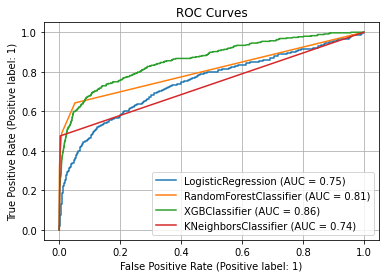

In [ ]:
ax = plt.gca()
plt.title("ROC Curves")
plt.grid()

for model in [logit, rf, xgb, KNN]:
    
    # plot ROC curve
    tmp_disp = plot_roc_curve(model, X_valid_sc, y_valid, ax=ax)

Le XGBClassifier semble être le plus performant.

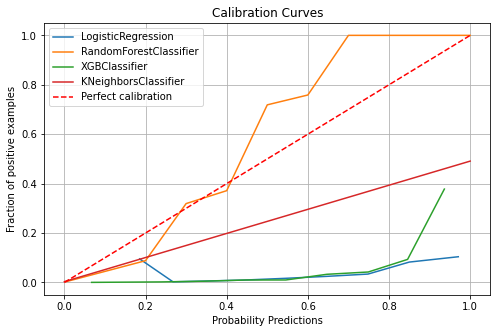

In [ ]:
from sklearn.calibration import calibration_curve

def plot_calibration_curve(bins):

    plt.figure(figsize=(8, 5))

    for model in [logit, rf, xgb, KNN]:

        # obtain predictions
        probs = model.predict_proba(X_valid_sc)[:, 1]

        # obtain calibration curve parameters
        fraction_of_positives, mean_predicted_value = calibration_curve(
            y_valid, probs, n_bins=bins, strategy='uniform')

        plt.plot(mean_predicted_value, fraction_of_positives,
                 label=type(model).__name__)

    # add perfectly calibrated predictions
    plt.plot(np.linspace(0, 1, bins), np.linspace(0, 1, bins),
             linestyle='--', color='red', label='Perfect calibration')

    # add labels
    plt.xlabel('Probability Predictions')
    plt.ylabel('Fraction of positive examples')
    plt.title('Calibration Curves')
    plt.legend(loc='upper left')

    # show
    plt.grid()
    plt.show()

plot_calibration_curve(bins=10)

In [ ]:
# Permutation Feature Importance
print('Permutation importance - XGBOOST')
from sklearn.inspection import permutation_importance
r = permutation_importance(xgb, X_valid_sc, y_valid,
                            n_repeats=30,
                            random_state=16)

for i in r.importances_mean.argsort()[::-1]:
    if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
        print(f"{df_train.columns[i]:<8} "
              f"{r.importances_mean[i]:.3f}"
              f" +/- {r.importances_std[i]:.3f}")

Permutation importance - XGBOOST
FM_Velocity_Condition_24 0.019 +/- 0.001
MCC      0.017 +/- 0.001
Montant  0.010 +/- 0.001
FM_Velocity_Condition_3 0.009 +/- 0.000
FM_Sum_3 0.008 +/- 0.000
FM_Velocity_Condition_12 0.004 +/- 0.000
FM_Velocity_Condition_6 0.003 +/- 0.000
Pays     0.002 +/- 0.000
CodeRep  0.001 +/- 0.000
FM_Difference_Pays_12 0.001 +/- 0.000
FM_Redondance_MCC_24 0.001 +/- 0.000
FM_Difference_Pays_3 0.000 +/- 0.000
FM_Difference_Pays_6 0.000 +/- 0.000
FM_Redondance_MCC_3 0.000 +/- 0.000


In [ ]:
print('Permutation importance - Random Forest')
r2 = permutation_importance(rf, X_valid_sc, y_valid,
                            n_repeats=30,
                            random_state=16)

for i in r2.importances_mean.argsort()[::-1]:
    if r2.importances_mean[i] - 2 * r.importances_std[i] > 0:
        print(f"{df_train.columns[i]:<8} "
              f"{r2.importances_mean[i]:.3f}"
              f" +/- {r2.importances_std[i]:.3f}")

Permutation importance - Random Forest
Montant  0.001 +/- 0.000
Month    0.000 +/- 0.000
Day      0.000 +/- 0.000
FM_Redondance_MCC_24 0.000 +/- 0.000
Dayofweek 0.000 +/- 0.000
FM_Redondance_MCC_6 0.000 +/- 0.000


### Tuning XGBOOST

In [ ]:
from sklearn.metrics import fbeta_score, make_scorer

def objective(trial):
  params = {
  'n_estimators': trial.suggest_int('n_estimators', 200, 800),
  'max_depth': trial.suggest_int('max_depth', 0, 20),
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 0.5),
  'subsample': trial.suggest_uniform('subsample', 0.1, 1),
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1),
  'gamma': trial.suggest_int('gamma', 0, 10),
  'tree_method': 'gpu_hist',  
  'objective': 'binary:logistic'
  }

  xgb = XGBClassifier(**params, random_state=16)
  xgb.fit(X_train_ros, y_train_ros)
  y_pred = xgb.predict(X_valid_sc)
  y_pred_label = np.rint(y_pred)
  
  #ftwo_scorer = make_scorer(fbeta_score, beta=2, average='weighted')

  recall = recall_score(y_valid, y_pred_label)

  return recall

In [ ]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50)

In [ ]:
xgb_tuned = XGBClassifier(**study.best_params)

In [ ]:
pred_xgb_valid = xgb_tuned.predict(X_valid_sc)

In [ ]:
print('Recall on validation set = ', recall_score(y_valid, pred_xgb_valid).round(3))

Recall on validation set =  0.836


#### Re-calibrating XGBOOST

2 méthodes de calibrations:
- sigmoid : La méthode sigmoid suppose que la courbe d'étalonnage peut être corrigée en appliquant une fonction sigmoid aux prédictions.
- isotonic : méthode plus performante quand il s'agit de corriger les distorsions monotones du modèle non calibré.

In [ ]:
pip install xgboost --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 192.9 MB 59 kB/s 
  Attempting uninstall: xgboost
    Found existing installation: xgboost 0.90
    Uninstalling xgboost-0.90:
      Successfully uninstalled xgboost-0.90


In [ ]:
from sklearn.calibration import calibration_curve, CalibratedClassifierCV

# Isotonic calibration
clf_isotonic = CalibratedClassifierCV(xgb_tuned, cv=5, method='isotonic')
clf_isotonic.fit(X_valid_sc, y_valid)
prob_isotonic = clf_isotonic.predict_proba(X_valid_sc)[:, 1]

# Gaussian Naive-Bayes with sigmoid calibration
clf_sigmoid = CalibratedClassifierCV(xgb_tuned, cv=5, method='sigmoid')
clf_sigmoid.fit(X_valid_sc, y_valid)
prob_sigmoid = clf_sigmoid.predict_proba(X_valid_sc)[:, 1]

In [ ]:
def plot_calibration_curve(y_true, probs, bins, strategy):

    fraction_of_positives, mean_predicted_value = calibration_curve(
        y_true, probs, n_bins=bins, strategy=strategy)
    
    max_val = max(mean_predicted_value)
    
    plt.figure(figsize=(8,10))
    plt.subplot(2, 1, 1)
    plt.plot(mean_predicted_value, fraction_of_positives, label='XGBOOST')
    plt.plot(np.linspace(0, max_val, bins), np.linspace(0, max_val, bins),
         linestyle='--', color='red', label='Perfect calibration')
    
    plt.xlabel('Probability Predictions')
    plt.ylabel('Fraction of positive examples')
    plt.title('Calibration Curve')
    plt.legend(loc='upper left')

    plt.show()

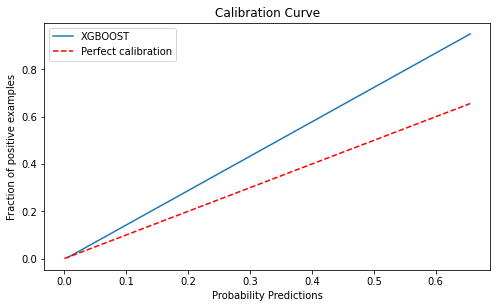

In [ ]:
plot_calibration_curve(y_valid, prob_isotonic, bins=2, strategy='uniform')

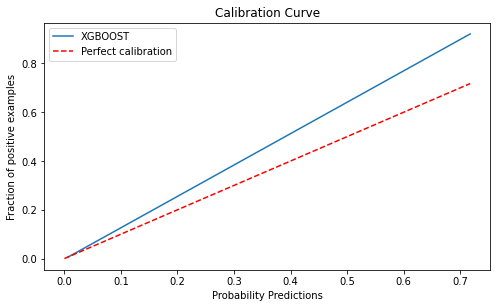

In [ ]:
plot_calibration_curve(y_valid, prob_sigmoid, bins=2, strategy='uniform')

Sigmoid marche légèrement mieux.

In [ ]:
# TESTING XGBOOST
pred_xgb_test = xgb_tuned.predict(X_test_sc)
print('Recall on test set = ', recall_score(y_test, pred_xgb_test).round(3))

Recall on test set =  0.845


Environ 85% des fraudes ont bien été prédites.

Je veux savoir combien d'applications nous pouvons essentiellement ignorer ou prioriser (parce que je sais que le modèle les prédit aussi bien que possible) pour les X pour cent supérieurs.

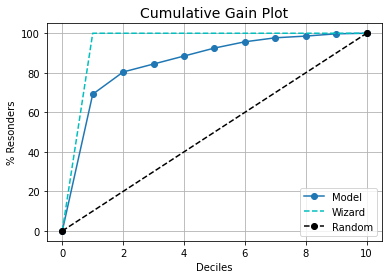

In [ ]:
#courbe de lift

# The magic happens here
import matplotlib.pyplot as plt


xgb_tuned.fit(X_train_ros, y_train_ros)
y_prob =xgb_tuned.predict_proba(X_test_sc)


# CUMMULATIVE GAIN PLOT
import kds
kds.metrics.plot_cumulative_gain(y_test, y_prob[:,1])


Environ 20% des données représentent 80% des Vrais positifs.  

In [ ]:
# Courbe de Lift
import scikitplot as skplt
skplt.metrics.plot_lift_curve(y_test, y_prob)
plt.show()

### ISOLATION FOREST

In [ ]:
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    brier_score_loss,
    roc_auc_score,
    plot_roc_curve,
    accuracy_score,
    recall_score,
    fbeta_score
)

from sklearn.metrics import make_scorer

In [ ]:
df_X = df_K.sample(5000)
X = df_X.drop('fraude',axis=1) # X = Fraud
pca = PCA(n_components=2)
tsne = TSNE(n_components=2)
ipca = IncrementalPCA(n_components=2)

x_pca = pca.fit_transform(X)
x_tsne = tsne.fit_transform(X)

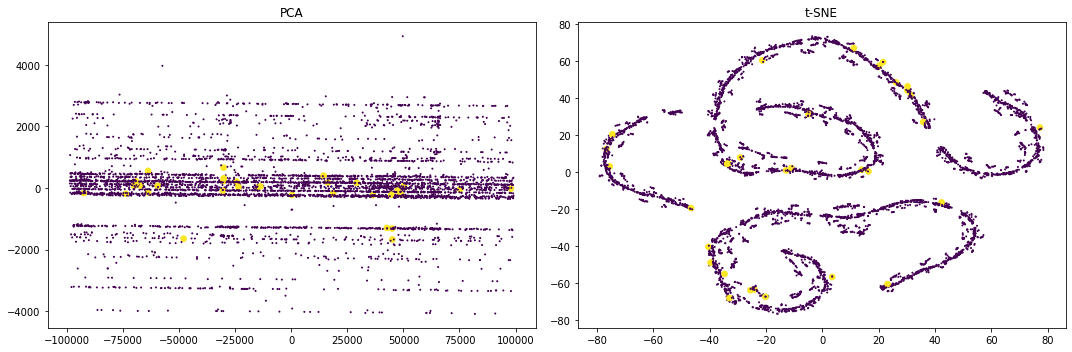

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

sizes = pd.Series(df_X['fraude']+1).pow(5) # represent fraud with bigger point

axes[0].scatter(x_pca[:, 0], x_pca[:, 1], s=sizes, c=df_X['fraude'].values)
axes[1].scatter(x_tsne[:, 0], x_tsne[:, 1], s=sizes, c=df_X['fraude'].values)

axes[0].set_title('PCA')
axes[1].set_title('t-SNE')

fig.tight_layout()
plt.show()

Ici nous avons utilisé deux méthodes de réduction de données pour mettre en évidence les outliers (en jaune) parmis l'ensemble du jeu de données. 

In [ ]:
# distinction entre inliers et outliers
Fraud = df_K[df_K['fraude'] == 1] #outliers
Valid = df_K[df_K['fraude'] == 0] #inliers

In [ ]:
# Nous enlevons la variable binaire fraude
Fraud = Fraud.drop('fraude',axis=1)
Valid = Valid.drop('fraude',axis=1)

In [ ]:
X_train_Fraud, X_test_Fraud = train_test_split(Fraud,test_size=0.3,random_state=16)
X_train_Valid, X_test_Valid = train_test_split(Valid,test_size=0.3,random_state=16)

In [ ]:
# IsolationForest
from sklearn.ensemble import IsolationForest
isofo = IsolationForest(n_estimators=100,
                        max_samples=50000, 
                        contamination=0.1,
                        random_state=16)
isofo.fit(X_train_Valid)

IsolationForest(contamination=0.1, max_samples=50000, random_state=16)

In [ ]:
inlier_pred_test = isofo.predict(X_test_Valid)
outlier_pred = isofo.predict(Fraud)

In [ ]:
print("Accuracy in Detecting Legit Cases:", list(inlier_pred_test).count(1)/inlier_pred_test.shape[0])
print("Accuracy in Detecting Fraud Cases:", list(outlier_pred).count(-1)/outlier_pred.shape[0])

Accuracy in Detecting Legit Cases: 0.9011141852539065
Accuracy in Detecting Fraud Cases: 0.3932276657060519


In [ ]:
from sklearn.ensemble import IsolationForest
clf = IsolationForest(n_estimators=100,
                        max_samples=50000, 
                        contamination=0.1,
                        random_state=16)

clf.fit(X_train_Valid)
pred = clf.predict(X_test_Valid)

X_test_Valid['anomaly']=pred

In [ ]:
X_test_Valid['anomaly'].value_counts()

 1    300403
-1     33204
Name: anomaly, dtype: int64

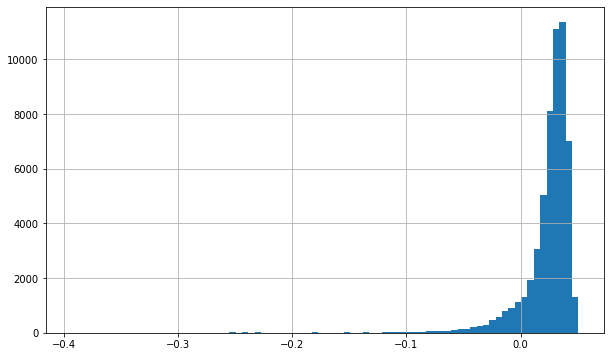

In [ ]:
# IsolationForest
from sklearn.ensemble import IsolationForest

Fraud = df_K[df_K['fraude'] == 1] #outliers
Valid = df_K[df_K['fraude'] == 0] #inliers

Outlier_fraction = len(Fraud)/float(len(Valid))

isofo = IsolationForest(n_estimators=100,
                        max_samples=50000, 
                        contamination=0.1,
                        random_state=16)
isofo.fit(X_train_sc)

preds = isofo.predict(X_valid_sc)

scores = isofo.decision_function(X_valid_sc) # Average anomaly score

plt.figure(figsize=(10, 6))
plt.hist(scores, bins=80)
plt.grid();

On remarque qu'il y a un mini cluster en dessous de -0.2, on considerera que les scores inférieurs à cette valeur représentent des anomalies.